In [1]:
!pip install wbgapi==1.0.7
!pip install plotly==4.14.3
!pip install pandas==1.2.4
!pip install numpy==1.20.1
!pip install seaborn==0.11.1
!pip install matplotlib==3.4.2

In [2]:
import wbgapi as wb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
print('wbgapi버전:',wb.__version__)
print('pandas버전:',pd.__version__)
print('numpy버전:',np.__version__)
print('seaborn버전:',sns.__version__)
print('matplotlib버전:',mpl.__version__)

wbgapi버전: 1.0.7
pandas버전: 1.2.4
numpy버전: 1.20.1
seaborn버전: 0.11.1
matplotlib버전: 3.4.2


In [4]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [5]:
# Total greenhouse gas emissions (kt of CO2 equivalent)
greenhouse = wb.data.DataFrame('EN.ATM.GHGT.KT.CE').loc['WLD', 'YR1990':'YR2018']

greenhouse = pd.DataFrame(greenhouse)
greenhouse_index = []
for year in greenhouse.index:
    greenhouse_index.append(int(year.replace('YR','')))

greenhouse.reindex(greenhouse_index)
greenhouse.index = greenhouse_index

In [6]:
# ARCTIC SEA ICE EXTENT
arctic_extent = pd.read_excel('./dataset/2485_Sept_Arctic_extent_1979-2021.xlsx', index_col=0)
arctic_extent = arctic_extent.set_index('year')
# OCEAN HEAT CONTENT
ocean_heat = pd.read_table('./dataset/pent_h22-w0-2000m.dat.txt')

# Global Temperature
temperature = pd.read_table('./dataset/graph.txt')

In [7]:
# temperature, ocean heat 데이터프레임 형태로 전처리

oceanList = []
ocean_col = [x for x in ocean_heat.columns[0].split(' ') if x!='']
for i in range(len(ocean_heat)):
    oceanList.append([x for x in ocean_heat.loc[i][0].split(' ') if x!=''])

ocean_heat = pd.DataFrame(oceanList, columns=ocean_col)

ocean_heat.rename(columns={'YEAR':'year'}, inplace=True)
ocean_heat = ocean_heat.astype('float')
ocean_heat.year = ocean_heat.year.astype('int')
ocean_heat = ocean_heat.set_index('year')



tempList = []
temp_col = [x for x in temperature.loc[1][0].split(' ') if x!='']
for i in range(3, len(temperature)):
    tempList.append([x for x in temperature.loc[i][0].split(' ') if x!=''])

temperature = pd.DataFrame(tempList, columns=temp_col)
temperature = temperature.astype('float')
temperature.Year = temperature.Year.astype('int')
temperature = temperature.set_index('Year')

# 기후 변화란?

## 북반구 해빙 면적

Text(0.5, 1.0, 'ARCTIC SEA ICE EXTENT')

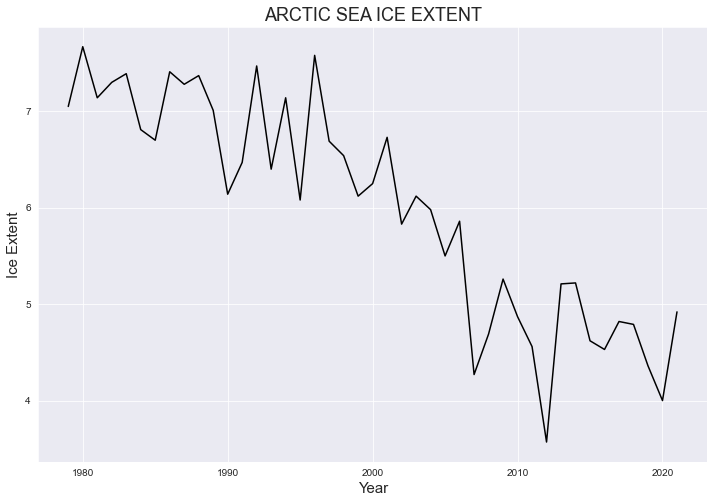

In [8]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

p = sns.lineplot(x = arctic_extent.index, y = arctic_extent['extent'], color = 'black')
p.set_xlabel('Year', fontsize=15)
p.set_ylabel('Ice Extent', fontsize=15)
p.set_title('ARCTIC SEA ICE EXTENT', fontsize=18)

## 해수 온도

Text(0, 0.5, 'Heat Content (10^22 Joules)')

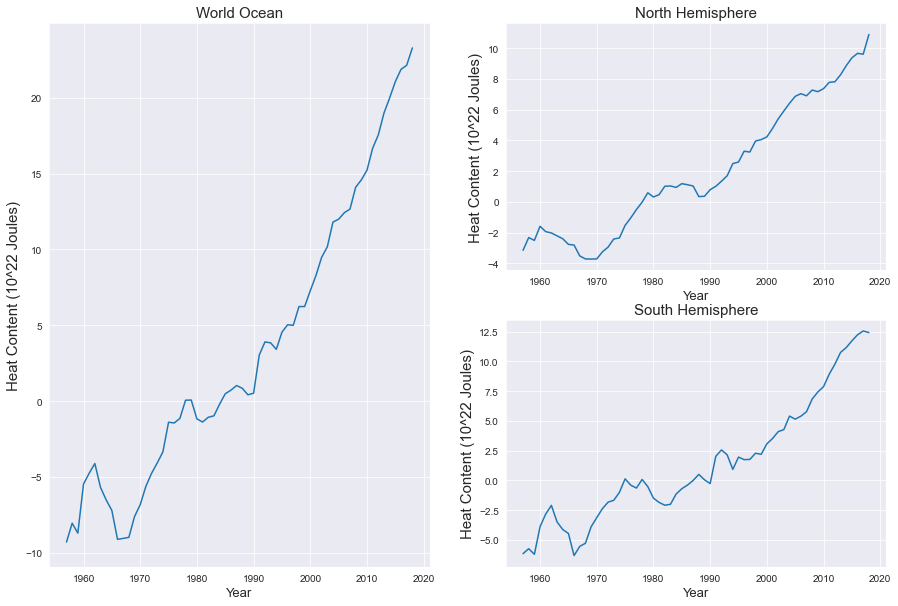

In [9]:
fig = plt.figure(figsize=(15, 10))

gs = mpl.gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0:, 0])
ax0.plot(ocean_heat.WO)
ax0.set_title('World Ocean', fontsize=15)
ax0.set_xlabel('Year', fontsize=13)
ax0.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(ocean_heat.NH)
ax1.set_title('North Hemisphere', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)


ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(ocean_heat.SH)
ax2.set_title('South Hemisphere', fontsize=15)
ax2.set_xlabel('Year', fontsize=13)
ax2.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)

### 해석: 북극의 해빙 면적(extent)은 단기적으로는 증가와 감소를 반복하지만, 장기적으로 감소했다. 해수 온도의 경우에는 북반구와 남반구 모두 꾸준히 상승하는 추세를 보였다. 또한, 2000년대 이후 기후 변화의 현상은 더 가속화되었음을 확인할 수 있다. 

# 지구 온난화란?

## 세계 기온

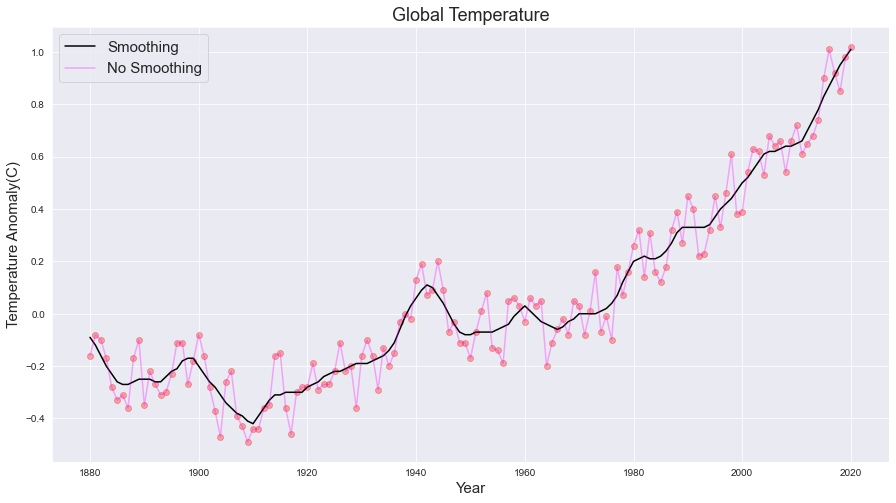

In [10]:
plt.figure(figsize=(15,8))

plt.plot(temperature['Lowess(5)'], color = 'black', label = 'Smoothing')
plt.plot(temperature['No_Smoothing'], color='magenta', alpha=0.3, label = 'No Smoothing')
plt.scatter(x=temperature.index, y=temperature['No_Smoothing'], color='red', alpha=0.3, label=None)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature Anomaly(C)', fontsize=15)
plt.title('Global Temperature', fontsize=18)


plt.legend(fontsize=15)

## 온실가스 배출량

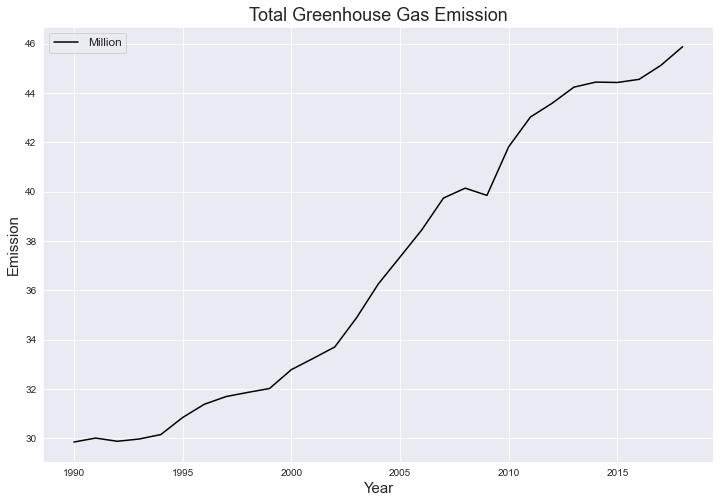

In [11]:
plt.figure(figsize=(12,8))

p = sns.lineplot(x = greenhouse.index, y = greenhouse.loc[:,'WLD']/1000000, color = 'black', label = 'Million')
p.set_xlabel('Year', fontsize=15)
p.set_ylabel('Emission', fontsize=15)
p.set_title('Total Greenhouse Gas Emission', fontsize=18)
plt.legend(fontsize=12)

### 해석: 세계 온도의 경우에도 1910년 이후에는 꾸준히 상승하고 있으며, 온실가스 배출량 또한 마찬가지였다. 이러한 결과를 통해 기후변화의 심각성을 알 수 있었다.

#   CO2 배출량 (CO2데이터)

### 데이터 불러오기

In [12]:
co2_meta_data=pd.read_csv('./dataset/Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [13]:
co2_meta_data.shape

(265, 6)

In [14]:
co2_value_data=pd.read_csv('./dataset/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


### 데이터 전처리

* 분석 시 필요없는 열(컬럼) 제거

In [15]:
co2_meta_data.drop(columns=['SpecialNotes','TableName','Unnamed: 5'],axis=1,inplace=True)
co2_value_data.drop(columns=['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [16]:
print(co2_meta_data.shape)
print(co2_value_data.shape)

(265, 3)
(266, 63)


* 컬럼명 변경

In [17]:
#컬럼명 변경 함수 생성
def change_col(cols):
    cols = cols.str.strip().str.lower().str.replace(" ", "_").str.replace('(', '').str.replace(')', '')
    return cols

In [18]:
#co2_meta_data와 co2_value_data에 대해 모두 컬럼명을 변경해준다. 
co2_meta_data.columns = change_col(co2_meta_data.columns)
co2_value_data.columns = change_col(co2_value_data.columns)

* 결측치 처리(bfill)

In [19]:
#결측치 처리 (bfill)
co2_value_data.iloc[:,2:] = co2_value_data.iloc[:,2:].fillna(method='bfill',axis=1)
f_co2_value_data = co2_value_data

In [20]:
f_co2_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


* 결측치 처리(ffill)

In [21]:
#결측치 처리 (ffill)
f_co2_value_data.iloc[:,2:] = f_co2_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_co2_value_data =f_co2_value_data

* 분석 시 필요없는 열(컬럼) 제거

In [22]:
#분석 시 필요없는 열 제거 
final_co2_value_data.drop(['2019','2020'],axis=1,inplace=True)

In [23]:
final_co2_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          250 non-null    float64
 3   1961          250 non-null    float64
 4   1962          250 non-null    float64
 5   1963          250 non-null    float64
 6   1964          250 non-null    float64
 7   1965          250 non-null    float64
 8   1966          250 non-null    float64
 9   1967          250 non-null    float64
 10  1968          250 non-null    float64
 11  1969          250 non-null    float64
 12  1970          250 non-null    float64
 13  1971          250 non-null    float64
 14  1972          250 non-null    float64
 15  1973          250 non-null    float64
 16  1974          250 non-null    float64
 17  1975          250 non-null    float64
 18  1976          250 non-null    

* meta_data에는 있는데 value_data에는 없는 country_code를 제거한다. 

In [24]:
#meta_data에는 있는데 value_data에는 없는 country_code 제거 
final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)]

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
index_drop_co2=final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)].index
print(index_drop_co2)

Int64Index([110], dtype='int64')


In [26]:
final_co2_value_data.drop(index_drop_co2,inplace=True)

* Meta data(co2_meta_data)와 Value data(final_co2_value_data)를 병합(merge) =>co2_mergedData

In [27]:
co2_mergedData = pd.merge(co2_meta_data, final_co2_value_data, on=["country_code"], how="inner")
co2_mergedData

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,3278.2980,3278.2980,3278.2980,3278.2980,3278.2980,3916.3560,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [28]:
co2_mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  265 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   216 non-null    object 
 3   country_name  265 non-null    object 
 4   1960          250 non-null    float64
 5   1961          250 non-null    float64
 6   1962          250 non-null    float64
 7   1963          250 non-null    float64
 8   1964          250 non-null    float64
 9   1965          250 non-null    float64
 10  1966          250 non-null    float64
 11  1967          250 non-null    float64
 12  1968          250 non-null    float64
 13  1969          250 non-null    float64
 14  1970          250 non-null    float64
 15  1971          250 non-null    float64
 16  1972          250 non-null    float64
 17  1973          250 non-null    float64
 18  1974          250 non-null    

In [29]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000


In [30]:
year_data_co2=co2_mergedData.iloc[:,4:]
year_data_co2

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,11378.7010,14891.6870,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,174004.8927,182939.9843,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,1224.7780,942.4190,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,16527.1690,23743.8250,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,1672.1520,2786.9200,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,99.0090,102.6760,128.3450,135.6790,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,128356.0010,133885.8370,138084.5520,143280.6910,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,3278.2980,3278.2980,3278.2980,3278.2980,3278.2980,3916.3560,3501.9850,4792.7690,4572.7490,4275.7220,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [31]:
cols=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970',
     '1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
     '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
     '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
     '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

* 음수값이 포함된 행을 삭제하기 위해 음수값이 포함된 행의 인덱스를 찾고 해당하는 행을 삭제한다. 

In [32]:
zero_list=[]
for col in cols:
    idx=year_data_co2[year_data_co2[col]<0].index
    if (len(idx))>0:
        zero_list.append(idx)

In [33]:
#음수값이 포함된 행의 인덱스를 찾아 해당하는 행을 삭제한다. 
co2_mergedData.drop(zero_list[0],inplace=True)

In [34]:
co2_mergedData.shape

(264, 63)

* country_name열에 개별 국가만 포함된 것이 아니기에 개별 국가만을 의미하는 country_list를 따로 만든다. 

In [35]:
#개별 국가만을 의미하는 country_list를 따로 만든다. 

country_list=['Afghanistan','Angola','Albania','Argentina','Armenia','Australia'
,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Vietnam','Yemen, Rep.','Congo, Dem. Rep.','Zambia','Zimbabwe'   
]

* country_list에 포함된 국가만을 남긴다. 

In [36]:
#co2_mergedData 데이터프레임은 country_list에 포함된 국가만 남은 데이터프레임이다.
co2_mergedData=co2_mergedData[co2_mergedData['country_name'].isin(country_list)]
co2_mergedData.shape

(151, 63)

In [37]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,AFG,South Asia,Low income,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,...,6000.0,8670.0,12260.0,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,27150.0,28530.0,29460.0,30250.0,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0
5,ALB,Europe & Central Asia,Upper middle income,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4320.0,4580.0,5040.0,4580.0,4790.0,5220.0,5070.0,4930.0,5600.0,5560.0
9,ARG,Latin America & Caribbean,Upper middle income,Argentina,48815.104,51180.319,53695.881,50083.886,55727.399,58866.351,...,157440.0,168140.0,177260.0,178530.0,184000.0,179910.0,186090.0,184280.0,180120.0,177410.0
10,ARM,Europe & Central Asia,Upper middle income,Armenia,19850.000,19850.000,19850.000,19850.000,19850.000,19850.000,...,4510.0,4340.0,4940.0,5720.0,5500.0,5480.0,5340.0,5070.0,5320.0,5550.0


In [38]:
#데이터 재구조화(reshape)
co2_merged_clean= pd.melt(co2_mergedData,id_vars = ["country_name","country_code","region","incomegroup"],var_name = "year")

In [39]:
co2_merged_clean

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,19850.000
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.000
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.000
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.000
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.000


## 2018년 CO2배출량 시각화 & 1960년 CO2배출량 시각화

In [40]:
#2018년 CO2배출량 시각화 
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        color='continent',
        showscale = True,
        locations = co2_mergedData['country_name'].values,
        z = co2_mergedData['2018'].values,
        locationmode = 'country names',
        text = co2_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CO2 emission')
            )
       ]

layout = dict(
    title = 'World Map of CO2 emission in the Year 2018',
    geo = dict(showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type='natural earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2018')

#1960년 CO2배출량 시각화
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        color='continent',
        showscale = True,
        locations = co2_mergedData['country_name'].values,
        z = co2_mergedData['1960'].values,
        locationmode = 'country names',
        text = co2_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CO2 emission')
            )
       ]

layout = dict(
    title = 'World Map of CO2 emission in the Year 1960',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type='natural earth',
        rotation = dict(
            lon = 60,
            lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(202, 202, 202)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1960')

# 1960년,2018년 지역별 CO2배출량 시각화 및 각 지역의 CO2배출량/전체 지역의 CO2배출량 시각화 

In [41]:
co2_1960=co2_merged_clean[co2_merged_clean['year']=='1960']
co2_1960

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,19850.000
...,...,...,...,...,...,...
146,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,1960,117770.000
147,Vietnam,VNM,East Asia & Pacific,Lower middle income,1960,5944.207
148,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,1960,58.672
149,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1960,3278.298


In [42]:
co2_2018=co2_merged_clean[co2_merged_clean['year']=='2018']
co2_2018

,country_name,country_code,region,incomegroup,year,value
8758,Afghanistan,AFG,South Asia,Low income,2018,7440.0
8759,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,27340.0
8760,Albania,ALB,Europe & Central Asia,Upper middle income,2018,5560.0
8761,Argentina,ARG,Latin America & Caribbean,Upper middle income,2018,177410.0
8762,Armenia,ARM,Europe & Central Asia,Upper middle income,2018,5550.0
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.0
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.0
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.0
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.0


In [43]:
#지역별로 그룹화 
co2_1960_region=co2_1960.groupby('region')['value'].sum()
co2_2018_region=co2_2018.groupby('region')['value'].sum()

## 1960년

### 1960년 지역별 CO2 배출량 시각화

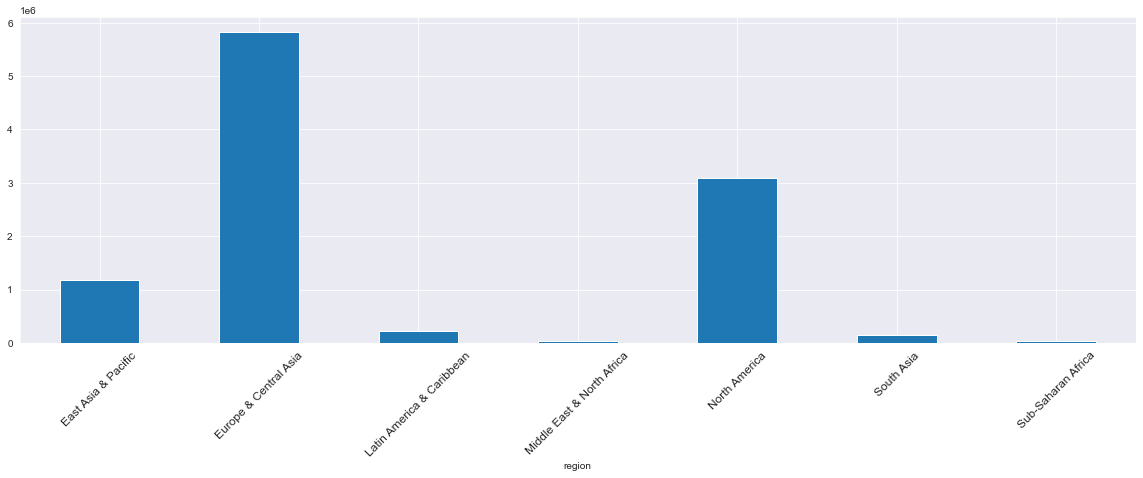

CO2 emissions(region)-1960

region
East Asia & Pacific           1175130.487
Europe & Central Asia         5818799.852
Latin America & Caribbean      228864.804
Middle East & North Africa      45148.104
North America                 3083591.301
South Asia                     151652.452
Sub-Saharan Africa              28773.054
Name: value, dtype: float64


In [44]:
plt.figure(figsize = (20,6))
co2_1960_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45,fontsize=12)
plt.show()
print("CO2 emissions(region)-1960\n")
print(co2_1960.groupby('region')['value'].sum())

### 1960년 각 지역의 CO2배출량/전체 지역의 CO2배출량 시각화 

region
East Asia & Pacific           11.157757
Europe & Central Asia         55.248974
Latin America & Caribbean      2.173050
Middle East & North Africa     0.428677
North America                 29.278418
South Asia                     1.439926
Sub-Saharan Africa             0.273198
Name: value, dtype: float64
100.00000000000001


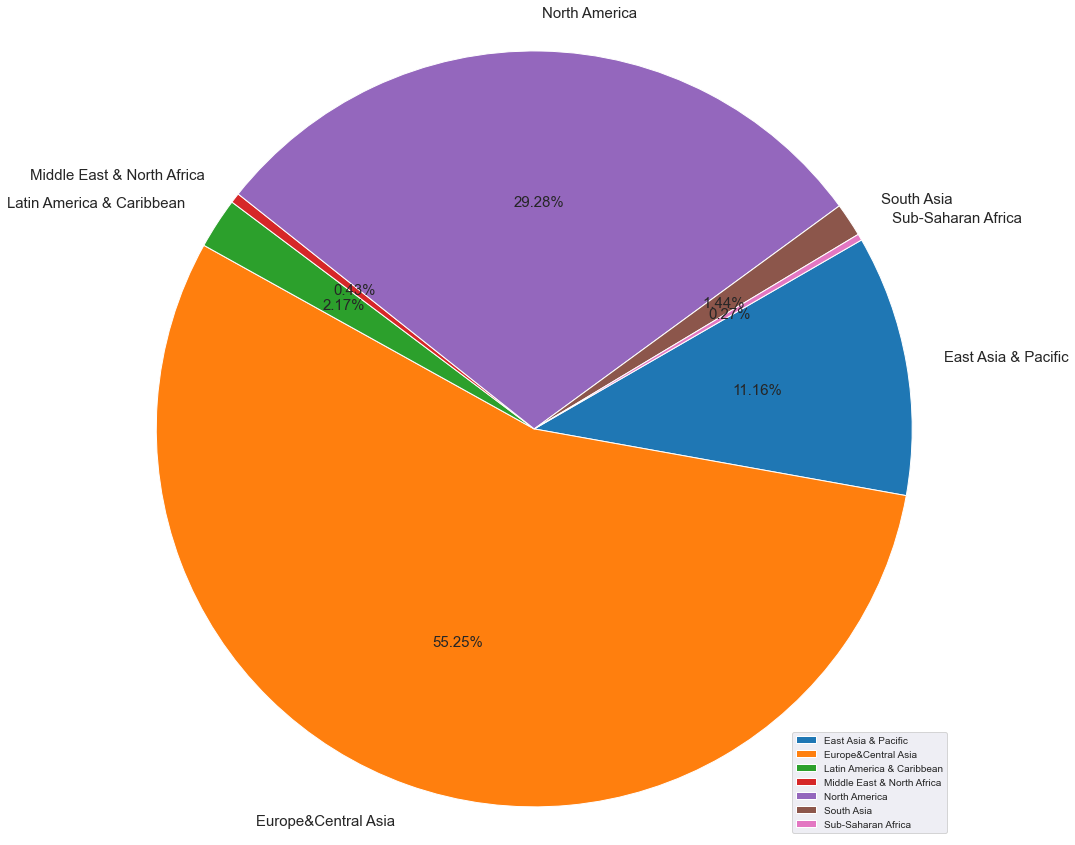

In [45]:
total_sum=co2_1960.groupby('region')['value'].sum().sum()
region_sum=co2_1960.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) 
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,15))
plt.pie(ratio,labels=labels,startangle=30,autopct='%.2f%%',textprops={'size':15},counterclock=False)

plt.legend(loc='lower right')
plt.axis('equal')
plt.show()

## 2018년

### 2018년 지역별 CO2 배출량 시각화

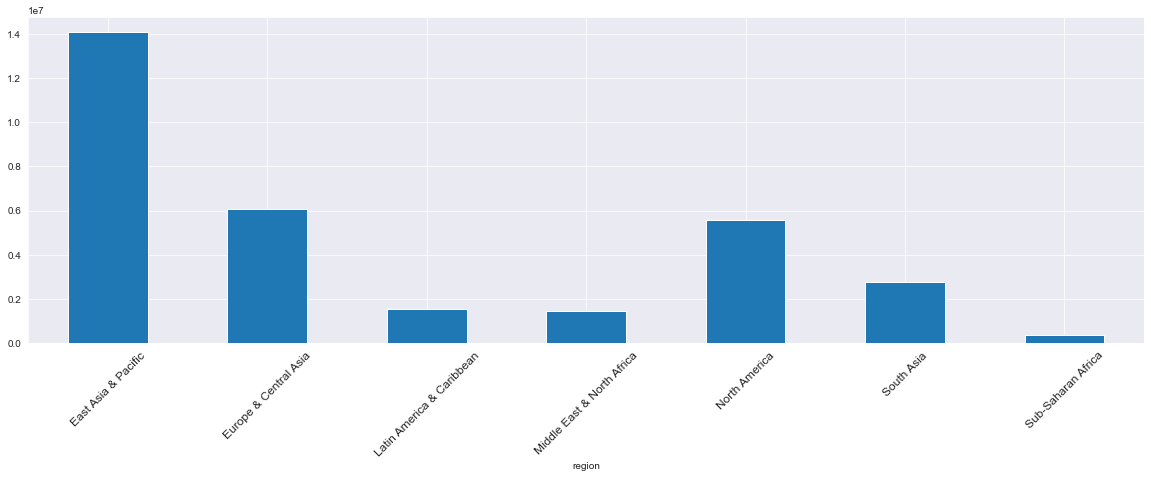

CO2 emissions(region)-2018

region
East Asia & Pacific           14079870.0
Europe & Central Asia          6080860.0
Latin America & Caribbean      1517290.0
Middle East & North Africa     1446910.0
North America                  5555700.0
South Asia                     2770040.0
Sub-Saharan Africa              349340.0
Name: value, dtype: float64


In [46]:
plt.figure(figsize = (20,6))
co2_2018_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45,fontsize=12)
plt.show()
print("CO2 emissions(region)-2018\n")
print(co2_2018.groupby('region')['value'].sum())

### 2018년 각 지역의 CO2배출량/전체 지역의 CO2배출량 시각화 

region
East Asia & Pacific           44.276307
Europe & Central Asia         19.122195
Latin America & Caribbean      4.771351
Middle East & North Africa     4.550030
North America                 17.470749
South Asia                     8.710815
Sub-Saharan Africa             1.098553
Name: value, dtype: float64
100.0


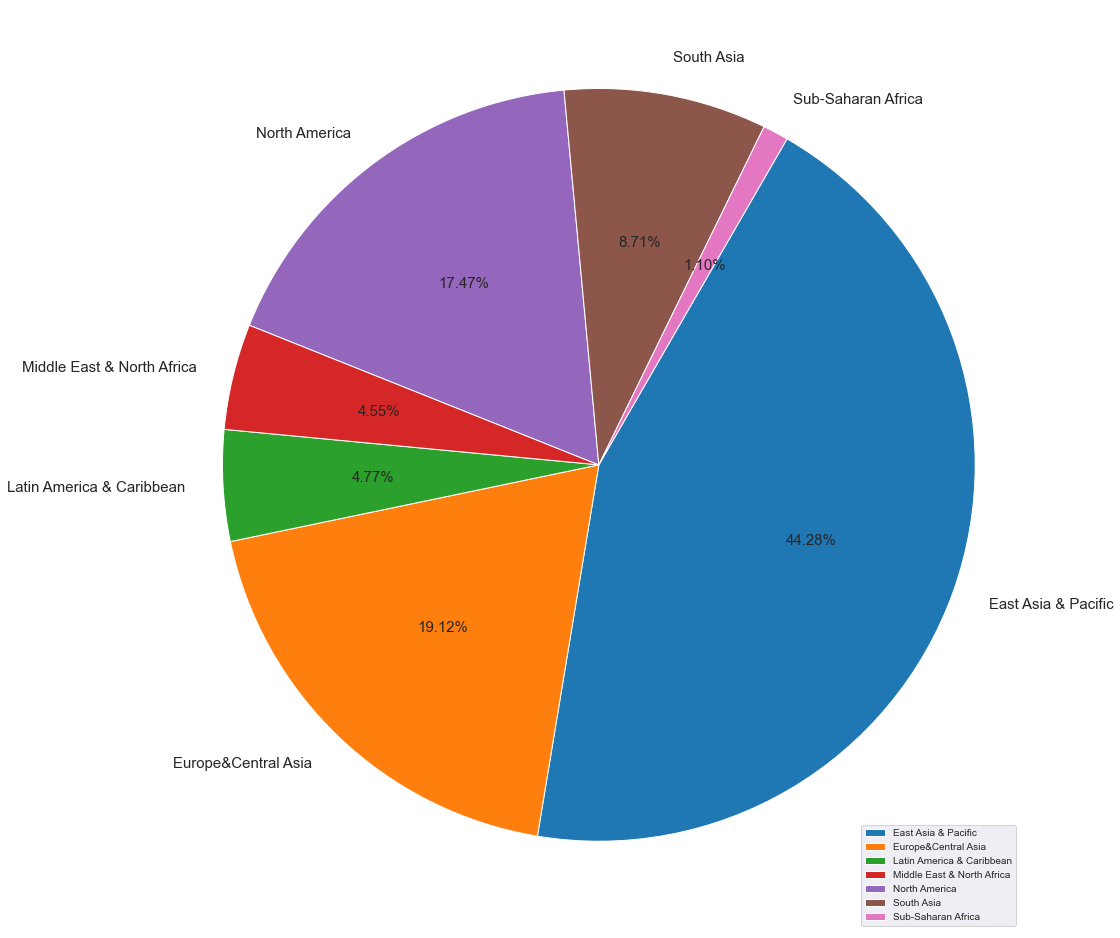

In [47]:
total_sum=co2_2018.groupby('region')['value'].sum().sum()
region_sum=co2_2018.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) 
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
plt.legend(loc='lower right')
plt.axis('equal')
plt.show()

### 해석: 지역별 CO2 전체 배출량 대비 비율은 1960년대 유럽&중앙 아시아가 55.25%로 1위였으나, 2018년에는 동아시아&태평양 국가들이 44.28%로 순위가 바뀌었다.

## 가장 최근(2018년) CO2배출량이 가장 많았던 국가 5개를 뽑아내자. 

In [48]:
co2_merged_clean2018=co2_merged_clean[co2_merged_clean.year=='2018'].sort_values('value',ascending=False)
co2_merged_clean2018

,country_name,country_code,region,incomegroup,year,value
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,10313460.0
8903,United States,USA,North America,High income,2018,4981300.0
8820,India,IND,South Asia,Lower middle income,2018,2434520.0
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1607550.0
8828,Japan,JPN,East Asia & Pacific,High income,2018,1106150.0
...,...,...,...,...,...,...
8766,Burundi,BDI,Sub-Saharan Africa,Low income,2018,590.0
8882,Solomon Islands,SLB,East Asia & Pacific,Lower middle income,2018,370.0
8782,Central African Republic,CAF,Sub-Saharan Africa,Low income,2018,330.0
8790,Comoros,COM,Sub-Saharan Africa,Lower middle income,2018,260.0


In [49]:
#co2배출량이 가장 많았던 국가 5개를 뽑아내자->co2_top5_country 
top5_co2_2018=co2_merged_clean2018.head(5).country_name[:5]
co2_top5_country=[]
for country in top5_co2_2018:
    co2_top5_country.append(country)
co2_top5_country

['China', 'United States', 'India', 'Russian Federation', 'Japan']

* 가장 최근(2018년) CO2배출량이 가장 많았던 국가5개는 China, United States, India, Russian Federation, Japan이다. 

## 추출한 5개 국가의 연도별 CO2배출량 합 추이를 그려보자. 

In [50]:
df_new_co2=co2_merged_clean[co2_merged_clean['country_name'].isin(co2_top5_country)]
df_new_co2

,country_name,country_code,region,incomegroup,year,value
28,China,CHN,East Asia & Pacific,Upper middle income,1960,7.807263e+05
62,India,IND,South Asia,Lower middle income,1960,1.205820e+05
70,Japan,JPN,East Asia & Pacific,High income,1960,2.327812e+05
119,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1960,1.448637e+06
145,United States,USA,North America,High income,1960,2.890696e+06
...,...,...,...,...,...,...
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,1.031346e+07
8820,India,IND,South Asia,Lower middle income,2018,2.434520e+06
8828,Japan,JPN,East Asia & Pacific,High income,2018,1.106150e+06
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1.607550e+06


In [51]:
df_new_co2.set_index('year',inplace=True)
df_new_co2

,country_name,country_code,region,incomegroup,value
year,,,,,
1960,China,CHN,East Asia & Pacific,Upper middle income,7.807263e+05
1960,India,IND,South Asia,Lower middle income,1.205820e+05
1960,Japan,JPN,East Asia & Pacific,High income,2.327812e+05
1960,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1.448637e+06
1960,United States,USA,North America,High income,2.890696e+06
...,...,...,...,...,...
2018,China,CHN,East Asia & Pacific,Upper middle income,1.031346e+07
2018,India,IND,South Asia,Lower middle income,2.434520e+06
2018,Japan,JPN,East Asia & Pacific,High income,1.106150e+06


## 추출한 5개 국가의 연도별 CO2배출량 합 추이

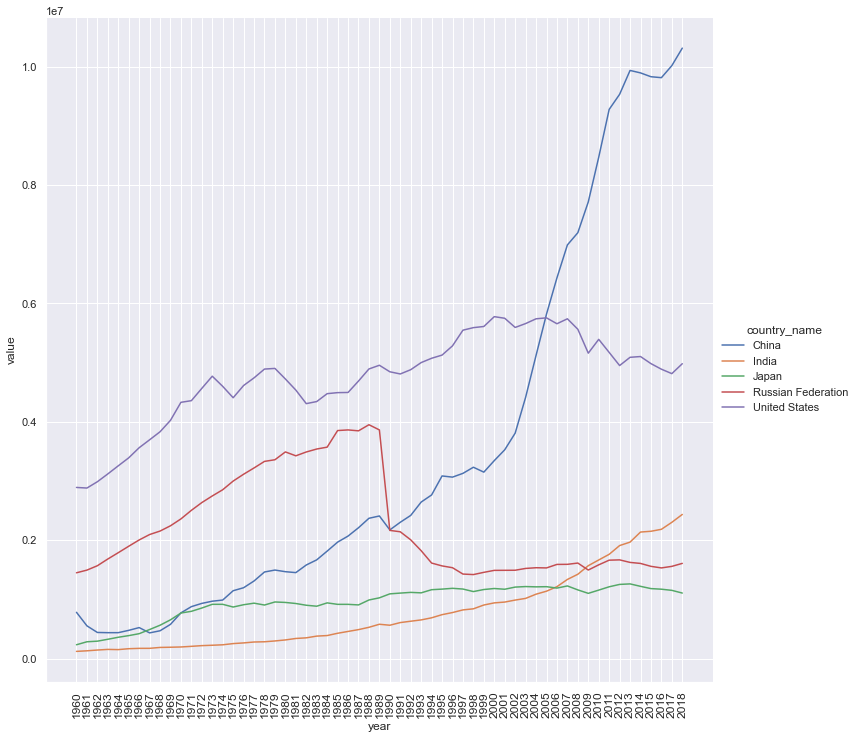

In [52]:
#추출한 5개 국가에 대해 연도별 CO2배출량 합 추이 
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)

g=sns.relplot(x=df_new_co2.index,y=df_new_co2.value,hue=df_new_co2.country_name,height=10,kind='line')
plt.xticks(size=12,rotation=90)
plt.show()

### 해석: 1960년 CO2 배출량의 최대값은 3 million kt 수준이었다. 당시에는 미국의 배출량이 가장 많았으며, 러시아 다음 중국 순으로 많았다. 한편, 2018년의 경우 배출량 최대값은 10 miilion kt로 약 3.3배 가량 증가했으며, 중국, 미국, 러시아 순으로 배출량이 많았다. 지역별 전체 배출량 대비 비율은 1960년대 유럽&중앙 아시아가 55.25%로 1위였으나, 2018년에는 동아시아&태평양 국가들이 44.28%로 순위가 바뀌었다. 

## 지역별 CO2배출량 합 추이 

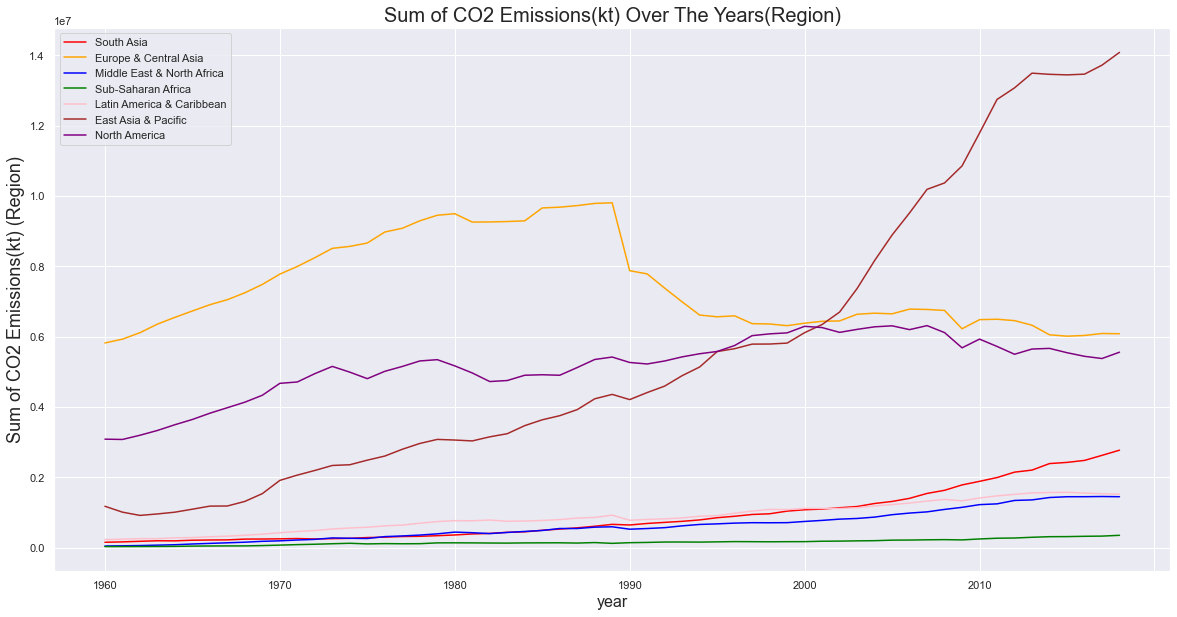

In [53]:
#지역별 CO2배출량 합 추이 
fig, ax = plt.subplots(figsize = (20,10))
co2_merged_clean[co2_merged_clean["region"] == "South Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "South Asia")
co2_merged_clean[co2_merged_clean["region"] == "Europe & Central Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Europe & Central Asia")
co2_merged_clean[co2_merged_clean["region"] == "Middle East & North Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Middle East & North Africa")
co2_merged_clean[co2_merged_clean["region"] == "Sub-Saharan Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Sub-Saharan Africa")
co2_merged_clean[co2_merged_clean["region"] == "Latin America & Caribbean"].groupby("year")["value"].sum().plot(ax = ax, color = "pink", label = "Latin America & Caribbean")
co2_merged_clean[co2_merged_clean["region"] == "East Asia & Pacific"].groupby("year")["value"].sum().plot(ax = ax, color = "brown", label = "East Asia & Pacific")
co2_merged_clean[co2_merged_clean["region"] == "North America"].groupby("year")["value"].sum().plot(ax = ax, color = "purple", label = "North America")

plt.xlabel("year", fontsize = 16)
plt.ylabel("Sum of CO2 Emissions(kt) (Region)", fontsize = 18) 
plt.title("Sum of CO2 Emissions(kt) Over The Years(Region)", fontsize = 20) 
plt.legend(fontsize = 11,loc='upper left')
plt.show()

## 세계 CO2배출량 합 추이 

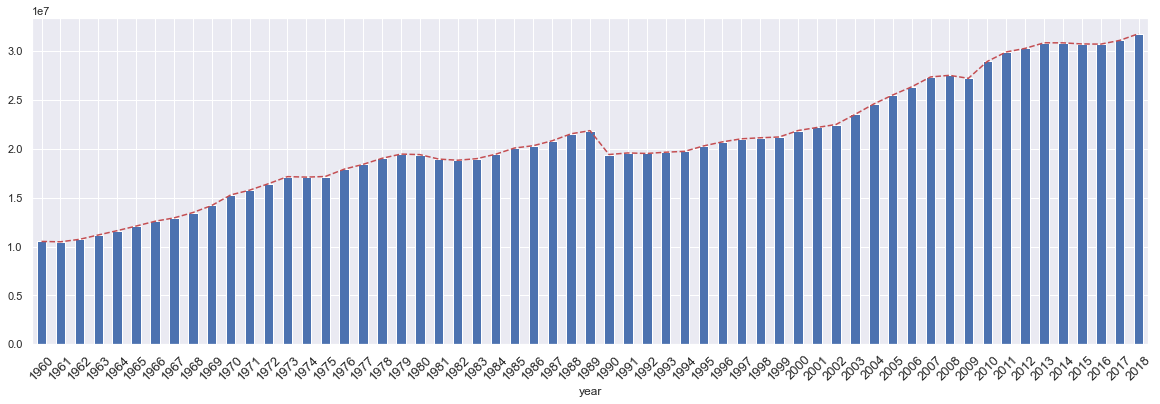

In [54]:
#세계 CO2배출량 합 추이 
plot_co2_year= co2_merged_clean.groupby("year")["value"].sum() 
plt.figure(figsize = (20,6))
plot_co2_year.plot(kind='bar',rot=0)
plot_co2_year.plot(kind='line',color='r',linestyle='--')
plt.xticks(rotation=45,size=13)
plt.show()

### 해석: 시간의 흐름에 따라 증가하는 형태를 보인다. 

# 우리의 데이터 변수 중 '소득' 과 CO2배출량 사이에 어떤 관계가 있을까? 

## Income Group별 CO2배출량 

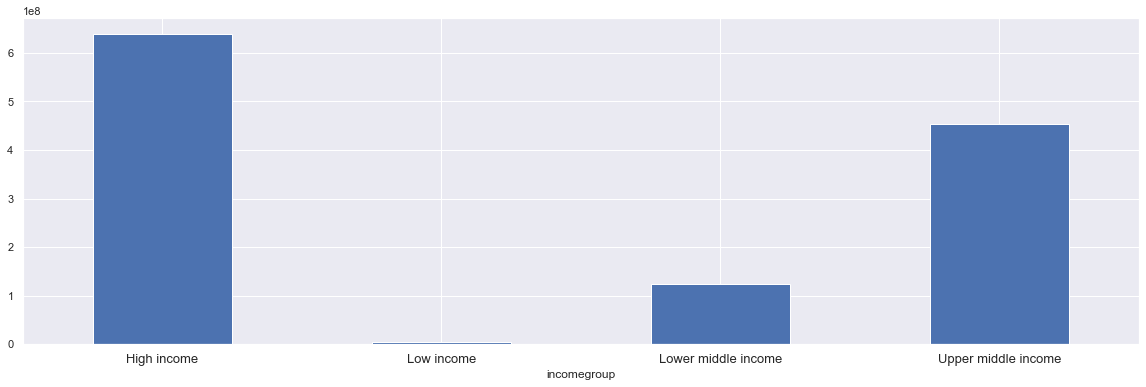

In [55]:
#Income Group별 CO2배출량
plot_co2_income= co2_merged_clean.groupby("incomegroup")["value"].sum()
plt.figure(figsize = (20,6))
plot_co2_income.plot(kind='bar',rot=0)
plt.xticks(size=13)
plt.show()

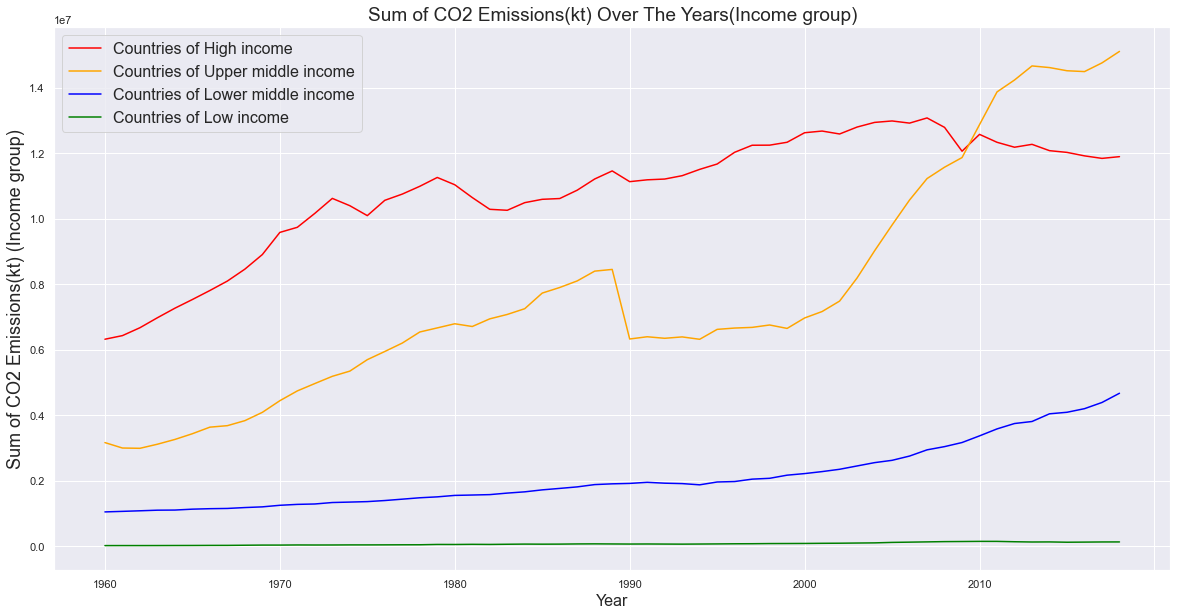

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
co2_merged_clean[co2_merged_clean["incomegroup"] == "High income"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "Countries of High income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Upper middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Countries of Upper middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Lower middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Countries of Lower middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Low income"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Countries of Low income")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Sum of CO2 Emissions(kt) (Income group)", fontsize = 18)
plt.title("Sum of CO2 Emissions(kt) Over The Years(Income group)", fontsize = 19) 
plt.legend(fontsize = 16,loc='upper left')
plt.show()

### 해석: 소득이 높은 국가일수록 CO2배출량이 많음을 알 수 있다. 

# 화석연료(Fossil Fuel 데이터)

In [57]:
global_fossil = pd.read_csv('./dataset/global-fossil-fuel-consumption.csv')
country_fossil = pd.read_csv('./dataset/fossil-fuel-primary-energy.csv')

In [58]:
fossil_y = ['Coal (TWh; direct energy)', 'Oil (TWh; direct energy)', 'Gas (TWh; direct energy)']
fig = px.area(global_fossil, x="Year", y=fossil_y, title='Global Fossil Fuel Consumption',
             labels={'value':'measured on terawatt-hours (TWh)'})

fig.show()

## 화석연료인 Coal, Oil, Gas와 CO2 사이의 상관관계를 살펴보자. 
### -상관관계를 보기위해 Country Code가 WLD(World)인 것만 가지고 와서 상관관계를 살펴보았다. 

In [59]:
global_fossil.head()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,World,OWID_WRL,1800,97,0,0
1,World,OWID_WRL,1810,128,0,0
2,World,OWID_WRL,1820,153,0,0
3,World,OWID_WRL,1830,264,0,0
4,World,OWID_WRL,1840,356,0,0


In [60]:
global_fossil.set_index('Year')

,Entity,Code,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
Year,,,,,
1800,World,OWID_WRL,97,0,0
1810,World,OWID_WRL,128,0,0
1820,World,OWID_WRL,153,0,0
1830,World,OWID_WRL,264,0,0
1840,World,OWID_WRL,356,0,0
...,...,...,...,...,...
2015,World,OWID_WRL,43844,50892,34781
2016,World,OWID_WRL,43196,51920,35589
2017,World,OWID_WRL,43360,52568,36586


In [61]:
#필요없는 열을 삭제하고 열 이름을 보기 좋게 변경해준다. 
global_fossil.drop(columns=['Code'],axis=1,inplace=True)
global_fossil.rename(columns={'Entity':'Country Name'},inplace=True)
global_fossil.head(5)

,Country Name,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,World,1800,97,0,0
1,World,1810,128,0,0
2,World,1820,153,0,0
3,World,1830,264,0,0
4,World,1840,356,0,0


In [62]:
global_fossil.set_index('Year')
global_fossil.drop(columns=['Country Name'],axis=1,inplace=True)

In [63]:
transpose_global_fossil=global_fossil.T
transpose_global_fossil.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Year,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [64]:
year_list=['1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900',
       '1910', '1920', '1930', '1940', '1950', '1960', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']

In [65]:
transpose_global_fossil.columns=year_list
transpose_global_fossil.head(5)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [66]:
transpose_global_fossil.drop(index=['Year'],axis=0,inplace=True)
transpose_global_fossil

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [67]:
global_fossil_19652018=transpose_global_fossil.iloc[:,17:-1]
global_fossil_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Coal (TWh; direct energy),16140,16324,16061,16301,16799,17059,16966,17154,17668,17682,...,40149,41997,44018,44185,44993,44954,43844,43196,43360,44109
Oil (TWh; direct energy),18109,19496,20891,22675,24577,26708,28205,30378,32746,32272,...,46654,48087,48550,49157,49689,50014,50892,51920,52568,53181
Gas (TWh; direct energy),6303,6869,7375,8044,8833,9614,10292,10861,11378,11656,...,29411,31606,32372,33219,33767,33994,34781,35589,36586,38517


In [68]:
co2_raw_data=pd.read_csv('./dataset/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [69]:
#Country Code가 WLD인 행만 뽑아내자. 
co2_world=co2_raw_data[co2_raw_data['Country Code']=='WLD']

In [70]:
co2_world

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,CO2 emissions (kt),EN.ATM.CO2E.KT,9463838.5,9423934.424,9732505.89,10274503.99,10820253.01,11402575.2,...,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97,NaN,NaN


In [71]:
co2_19652018=co2_world.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code','1960','1961','1962','1963','1964','2019','2020'],axis=1,)

In [72]:
co2_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97


In [73]:
co2_19652018=co2_19652018.rename(index={259:'CO2'})

In [74]:
co2_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CO2,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97


In [75]:
global_fossil_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Coal (TWh; direct energy),16140,16324,16061,16301,16799,17059,16966,17154,17668,17682,...,40149,41997,44018,44185,44993,44954,43844,43196,43360,44109
Oil (TWh; direct energy),18109,19496,20891,22675,24577,26708,28205,30378,32746,32272,...,46654,48087,48550,49157,49689,50014,50892,51920,52568,53181
Gas (TWh; direct energy),6303,6869,7375,8044,8833,9614,10292,10861,11378,11656,...,29411,31606,32372,33219,33767,33994,34781,35589,36586,38517


In [76]:
merged_co2_fossil=pd.concat([co2_19652018,global_fossil_19652018],axis=0)
merged_co2_fossil

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CO2,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97
Coal (TWh; direct energy),16140.0,16324.00,16061.00,16301.00,16799.00,17059.00,16966.00,17154.00,17668.0,17682.00,...,40149.00,41997.00,44018.00,44185.00,44993.00,44954.00,43844.00,43196.00,43360.00,44109.00
Oil (TWh; direct energy),18109.0,19496.00,20891.00,22675.00,24577.00,26708.00,28205.00,30378.00,32746.0,32272.00,...,46654.00,48087.00,48550.00,49157.00,49689.00,50014.00,50892.00,51920.00,52568.00,53181.00
Gas (TWh; direct energy),6303.0,6869.00,7375.00,8044.00,8833.00,9614.00,10292.00,10861.00,11378.0,11656.00,...,29411.00,31606.00,32372.00,33219.00,33767.00,33994.00,34781.00,35589.00,36586.00,38517.00


### 상관관계 분석 위한 새로운 데이터프레임 형성

In [77]:
transpose_merged_co2_fossil=merged_co2_fossil.transpose()
transpose_merged_co2_fossil

,CO2,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
1965,11402575.20,16140.0,18109.0,6303.0
1966,11988321.42,16324.0,19496.0,6869.0
1967,12413351.89,16061.0,20891.0,7375.0
1968,13087346.57,16301.0,22675.0,8044.0
1969,13976005.56,16799.0,24577.0,8833.0
1970,15272289.24,17059.0,26708.0,9614.0
1971,15913710.78,16966.0,28205.0,10292.0
1972,16680140.79,17154.0,30378.0,10861.0
1973,17582029.20,17668.0,32746.0,11378.0
1974,17563629.93,17682.0,32272.0,11656.0


In [78]:
series_co2=transpose_merged_co2_fossil['CO2'].astype(int)
series_coal=transpose_merged_co2_fossil['Coal (TWh; direct energy)'].astype(int)
series_oil=transpose_merged_co2_fossil['Oil (TWh; direct energy)'].astype(int)
series_gas=transpose_merged_co2_fossil['Gas (TWh; direct energy)'].astype(int)
final_co2_fossil=pd.concat([series_co2,series_coal,series_oil,series_gas],axis=1)

In [79]:
final_co2_fossil.rename(columns={'Coal (TWh; direct energy)':'coal','Oil (TWh; direct energy)':'oil','Gas (TWh; direct energy)':'gas'},inplace=True)
final_co2_fossil

,CO2,coal,oil,gas
1965,11402575,16140,18109,6303
1966,11988321,16324,19496,6869
1967,12413351,16061,20891,7375
1968,13087346,16301,22675,8044
1969,13976005,16799,24577,8833
1970,15272289,17059,26708,9614
1971,15913710,16966,28205,10292
1972,16680140,17154,30378,10861
1973,17582029,17668,32746,11378
1974,17563629,17682,32272,11656


In [80]:
final_co2_fossil.describe()

,CO2,coal,oil,gas
count,5.400000e+01,54.00000,54.000000,54.000000
mean,2.280026e+07,27738.62963,38623.574074,20513.962963
std,6.076147e+06,9589.29103,8745.328044,8829.757111
min,1.140258e+07,16061.00000,18109.000000,6303.000000
25%,1.983174e+07,19684.50000,33751.500000,13500.250000
50%,2.165604e+07,25834.50000,37895.000000,20021.000000
75%,2.707382e+07,35544.25000,46554.500000,27282.000000
max,3.404104e+07,44993.00000,53181.000000,38517.000000


## CO2, coal, oil, gas변수 간 상관계수 구하기 

In [81]:
corr_co2_fossil=final_co2_fossil[['CO2','coal','oil','gas']].corr(method='pearson')
corr_co2_fossil

,CO2,coal,oil,gas
CO2,1.000000,0.973382,0.962514,0.974622
coal,0.973382,1.000000,0.915496,0.975141
oil,0.962514,0.915496,1.000000,0.965268
gas,0.974622,0.975141,0.965268,1.000000


## Heatmap을 통한 상관계수 시각화 

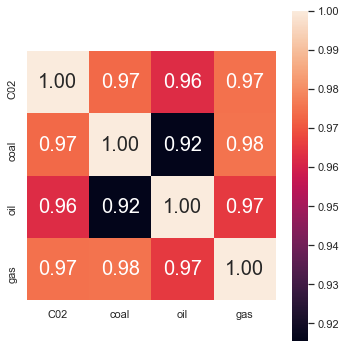

<Figure size 216x216 with 0 Axes>

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['C02','coal','oil','gas']
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
hm = sns.heatmap(corr_co2_fossil.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 20},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.figure(figsize=(3,3))
plt.show()

## 가장 최근(2018년) 기준으로 화석연료 사용량이 많은 상위 10개 국가를 뽑아 화석연료 사용량 추이를 시각화

In [83]:
country_fossil = country_fossil.dropna()

top = country_fossil[country_fossil.Year==2018].sort_values(by='Fossil Fuels (TWh)').tail(11).Entity[:10]

fossil_top10 = []
for country in top:
    fossil_top10.append(country)
    
top10_fossil = country_fossil[country_fossil['Entity'].isin(fossil_top10)]
top10_fossil = top10_fossil.pivot('Year','Entity', 'Fossil Fuels (TWh)').dropna(axis=0)

Text(0.5, 1.0, 'Which Countries use the most Energy from Fossil Fuels')

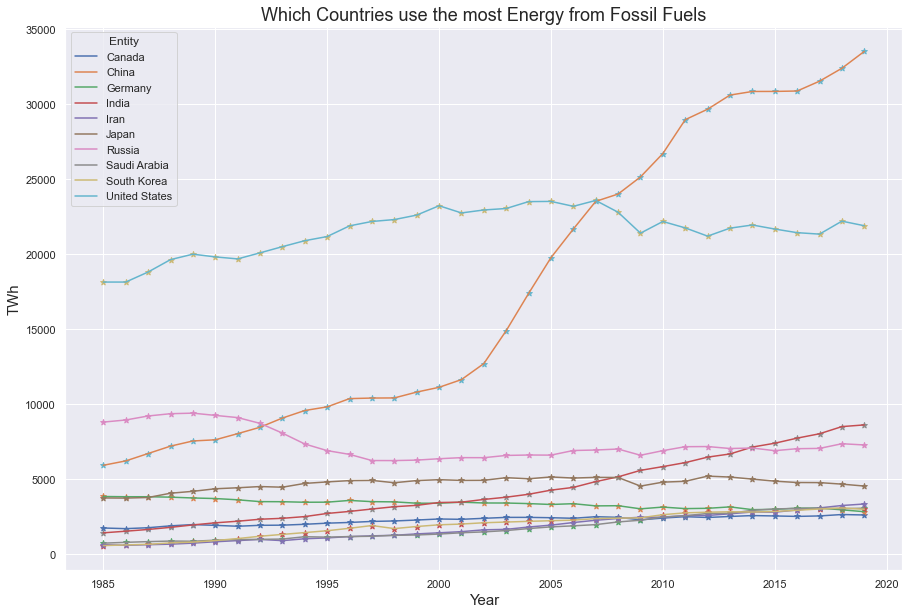

In [84]:
top10_fossil.plot(figsize=(15,10))
for country in fossil_top10:
    plt.scatter(x=top10_fossil.index, y=top10_fossil[country], marker='*')

plt.xlabel('Year', fontsize=15)
plt.ylabel('TWh', fontsize=15)
plt.title('Which Countries use the most Energy from Fossil Fuels', fontsize=18)

# CH4 배출량(CH4 데이터)

In [85]:
ch4_meta_data=pd.read_csv('./dataset/Metadata_Country_API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [86]:
ch4_meta_data.shape

(265, 6)

In [87]:
ch4_value_data=pd.read_csv('./dataset/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


## CH4데이터 전처리 

* 필요없는 열(컬럼) 제거

In [88]:
#필요없는 열(column) 제거 
ch4_meta_data.drop(columns=['SpecialNotes','TableName','Unnamed: 5'],axis=1,inplace=True)
ch4_value_data.drop(columns=['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [89]:
print(ch4_meta_data.shape)
print(ch4_value_data.shape)

(265, 3)
(266, 63)


* 컬럼명 변경

In [90]:
#컬럼명 변경
ch4_meta_data.columns = change_col(ch4_meta_data.columns)
ch4_value_data.columns = change_col(ch4_value_data.columns)

* 결측치 처리(bfill)

In [91]:
#결측치 처리(bfill)
ch4_value_data.iloc[:,2:] = ch4_value_data.iloc[:,2:].fillna(method='bfill',axis=1)
f_ch4_value_data=ch4_value_data

In [92]:
f_ch4_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


* 결측치 처리(ffill)

In [93]:
#결측치 처리(ffill)
f_ch4_value_data.iloc[:,2:] = f_ch4_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_ch4_value_data=f_ch4_value_data

In [94]:
final_ch4_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,Africa Eastern and Southern,AFE,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,...,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000,570040.0000,570040.0000
2,Afghanistan,AFG,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,...,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000,81510.0000,81510.0000
3,Africa Western and Central,AFW,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,...,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000,392130.0000,392130.0000
4,Angola,AGO,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,...,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000,35520.0000,35520.0000


* 분석 시 필요없는 열 제거

In [95]:
#분석 시 필요없는 열 제거 
final_ch4_value_data.drop(['1960','1961','1962','1963','1964','1965',
                           '1966','1967','1968','1969','2019','2020'],axis=1,inplace=True)

In [96]:
final_ch4_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1970          256 non-null    float64
 3   1971          256 non-null    float64
 4   1972          256 non-null    float64
 5   1973          256 non-null    float64
 6   1974          256 non-null    float64
 7   1975          256 non-null    float64
 8   1976          256 non-null    float64
 9   1977          256 non-null    float64
 10  1978          256 non-null    float64
 11  1979          256 non-null    float64
 12  1980          256 non-null    float64
 13  1981          256 non-null    float64
 14  1982          256 non-null    float64
 15  1983          256 non-null    float64
 16  1984          256 non-null    float64
 17  1985          256 non-null    float64
 18  1986          256 non-null    

* meta_data에는 있는데 value_data에는 없는 country_code제거 

In [97]:
#meta_data에는 있는데 value_data에는 없는 country_code 제거 
final_ch4_value_data[~final_ch4_value_data.country_code.isin(ch4_meta_data.country_code)]

,country_name,country_code,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
index_drop_ch4=final_ch4_value_data[~final_ch4_value_data.country_code.isin(ch4_meta_data.country_code)].index

In [99]:
final_ch4_value_data.drop(index_drop_ch4,inplace=True)

* Meta data(ch4_meta data)와 Value data(final_ch4_value_data)를 병합(merge)=>ch4_mergedData

In [100]:
ch4_mergedData = pd.merge(ch4_meta_data, final_ch4_value_data, on=["country_code"], how="inner")
ch4_mergedData

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,AFE,NaN,NaN,Africa Eastern and Southern,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,AFG,South Asia,Low income,Afghanistan,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,AFW,NaN,NaN,Africa Western and Central,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",2204.6700,2350.9700,2338.2200,2275.6300,2397.2700,2456.2800,...,7870.0000,8020.0000,8120.0000,8150.0000,8210.0000,8270.0000,8200.0000,8150.0000,8210.0000,8590.0000
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,32269.9000,31853.4000,32150.2000,33393.0000,34374.5000,35700.4000,...,42490.0000,43360.0000,43580.0000,44220.0000,44260.0000,44600.0000,44560.0000,44460.0000,44990.0000,45140.0000
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,33880.5000,14742.8000,16642.0000,18544.1000,14937.9000,19599.6000,...,14290.0000,15340.0000,15050.0000,16900.0000,17420.0000,17530.0000,18010.0000,17850.0000,17450.0000,17870.0000


In [101]:
ch4_mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  265 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   216 non-null    object 
 3   country_name  265 non-null    object 
 4   1970          256 non-null    float64
 5   1971          256 non-null    float64
 6   1972          256 non-null    float64
 7   1973          256 non-null    float64
 8   1974          256 non-null    float64
 9   1975          256 non-null    float64
 10  1976          256 non-null    float64
 11  1977          256 non-null    float64
 12  1978          256 non-null    float64
 13  1979          256 non-null    float64
 14  1980          256 non-null    float64
 15  1981          256 non-null    float64
 16  1982          256 non-null    float64
 17  1983          256 non-null    float64
 18  1984          256 non-null    

In [102]:
ch4_mergedData.head()

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,AFE,NaN,NaN,Africa Eastern and Southern,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,AFG,South Asia,Low income,Afghanistan,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,AFW,NaN,NaN,Africa Western and Central,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000


In [103]:
ch4_mergedData.columns

Index(['country_code', 'region', 'incomegroup', 'country_name', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [104]:
year_data_ch4=ch4_mergedData.iloc[:,4:]
year_data_ch4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,11.5069,11.6718,12.2338,12.4857,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,286699.8136,319345.1963,327883.6744,396278.3059,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,10535.6000,10455.9000,10380.1000,10176.2000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,154139.5180,166472.3378,152491.7936,176884.3183,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,15036.7000,17437.0000,18279.2000,22903.7000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,2204.6700,2350.9700,2338.2200,2275.6300,2397.2700,2456.2800,2353.0100,2379.9500,2404.6000,2427.4400,...,7870.0000,8020.0000,8120.0000,8150.0000,8210.0000,8270.0000,8200.0000,8150.0000,8210.0000,8590.0000
262,32269.9000,31853.4000,32150.2000,33393.0000,34374.5000,35700.4000,36502.3000,37856.4000,38728.0000,41239.3000,...,42490.0000,43360.0000,43580.0000,44220.0000,44260.0000,44600.0000,44560.0000,44460.0000,44990.0000,45140.0000
263,33880.5000,14742.8000,16642.0000,18544.1000,14937.9000,19599.6000,16628.4000,20391.4000,21838.0000,31530.3000,...,14290.0000,15340.0000,15050.0000,16900.0000,17420.0000,17530.0000,18010.0000,17850.0000,17450.0000,17870.0000


In [105]:
cols2=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
     '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
     '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
     '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

* 음수값이 포함된 행 인덱스를 찾아보자. 

In [106]:
#음수값이 포함된 행 엔딕스를 찾아보자. 
zero_list2=[]
for col2 in cols2:
    idx2=year_data_ch4[year_data_ch4[col2]<0].index
    
    if (len(idx2))>0:
        zero_list2.append(idx2)

In [107]:
print(zero_list2) 

[]


#### CH4데이터에는 음수값이 없다. 

* 개별 국가만 나열한 country_list에 포함된 국가들만 포함된 데이터들만 남겨 데이터프레임을 형성한다. 

In [108]:
#개별 국가만이 포함된 데이터들만 남겨 데이터프레임을 형성한다. 
ch4_mergedData=ch4_mergedData[ch4_mergedData['country_name'].isin(country_list)]
ch4_mergedData.shape

(152, 53)

In [109]:
ch4_mergedData.head()

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,AFG,South Asia,Low income,Afghanistan,10202.00,10201.50,9170.59,9403.54,9987.93,10476.60,...,25430.0,30010.0,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.60,14500.00,15590.00,16651.70,15008.30,17061.40,...,35590.0,37730.0,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0
5,ALB,Europe & Central Asia,Upper middle income,Albania,1763.64,1717.47,1737.08,1794.07,1815.36,1864.83,...,3110.0,3120.0,3120.0,3170.0,3190.0,3230.0,3250.0,3250.0,3210.0,3160.0
9,ARG,Latin America & Caribbean,Upper middle income,Argentina,84917.80,84729.10,88496.00,90791.30,91811.90,93881.00,...,117630.0,109830.0,109130.0,111740.0,113350.0,114180.0,114090.0,115580.0,117570.0,117850.0
10,ARM,Europe & Central Asia,Upper middle income,Armenia,1317.98,1384.62,1440.48,1485.25,1541.25,1587.12,...,2310.0,2370.0,2370.0,2420.0,2500.0,2540.0,2560.0,2570.0,2510.0,2430.0


In [110]:
ch4_merged_clean= pd.melt(ch4_mergedData,id_vars = ["country_name","country_code","region","incomegroup"], 
var_name = "year")

In [111]:
ch4_merged_clean

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1970,10202.00
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1970,23376.60
2,Albania,ALB,Europe & Central Asia,Upper middle income,1970,1763.64
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1970,84917.80
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1970,1317.98
...,...,...,...,...,...,...
7443,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,105930.00
7444,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,87750.00
7445,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,8590.00
7446,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,17870.00


## 2018년 CH4배출량 시각화 & 1970년 CH4배출량 시각화

In [112]:
#2018년 CH4배출량 시각화
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        color='continent',
        showscale = True,
        locations = ch4_mergedData['country_name'].values,
        z = ch4_mergedData['2018'].values,
        locationmode = 'country names',
        text = ch4_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CH4 emission')
            )
       ]

layout = dict(
    title = 'World Map of CH4 emission in the Year 2018',
    geo = dict(showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type='natural earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2018')

#1970년 CH4배출량 시각화
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        color='continent',
        showscale = True,
        locations = ch4_mergedData['country_name'].values,
        z = ch4_mergedData['1970'].values,
        locationmode = 'country names',
        text = ch4_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CH4 emission')
            )
       ]

layout = dict(
    title = 'World Map of CH4 emission in the Year 1970',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type='natural earth',
        rotation = dict(
            lon = 60,
            lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(202, 202, 202)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1970')

# 1970년,2018년 지역별 CH4배출량 시각화 및 각 지역의 CH4배출량/전체 지역의 CH4배출량 시각화 

In [113]:
ch4_1970=ch4_merged_clean[ch4_merged_clean['year']=='1970']
ch4_1970

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1970,10202.00
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1970,23376.60
2,Albania,ALB,Europe & Central Asia,Upper middle income,1970,1763.64
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1970,84917.80
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1970,1317.98
...,...,...,...,...,...,...
147,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,1970,16830.80
148,Vietnam,VNM,East Asia & Pacific,Lower middle income,1970,54144.90
149,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,1970,2204.67
150,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1970,33880.50


In [114]:
ch4_2018=ch4_merged_clean[ch4_merged_clean['year']=='2018']
ch4_2018

,country_name,country_code,region,incomegroup,year,value
7296,Afghanistan,AFG,South Asia,Low income,2018,81510.0
7297,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,35520.0
7298,Albania,ALB,Europe & Central Asia,Upper middle income,2018,3160.0
7299,Argentina,ARG,Latin America & Caribbean,Upper middle income,2018,117850.0
7300,Armenia,ARM,Europe & Central Asia,Upper middle income,2018,2430.0
...,...,...,...,...,...,...
7443,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,105930.0
7444,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,87750.0
7445,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,8590.0
7446,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,17870.0


In [115]:
ch4_1970_region=ch4_1970.groupby('region')['value'].sum()
ch4_2018_region=ch4_2018.groupby('region')['value'].sum()

## 1970년

### 1970년 지역별 CH4 배출량 시각화

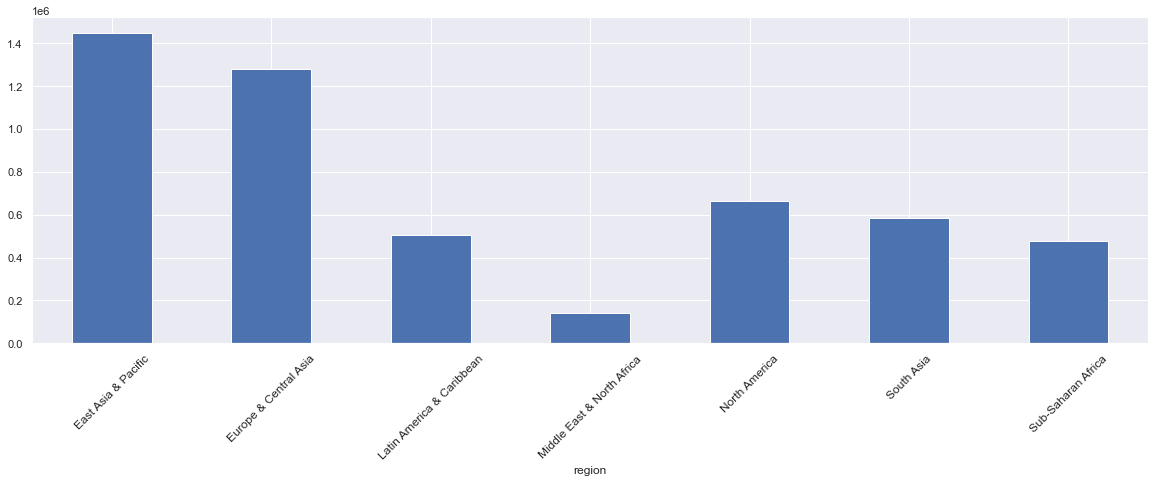

CH4 emissions(region)-1970

region
East Asia & Pacific           1.445721e+06
Europe & Central Asia         1.277195e+06
Latin America & Caribbean     5.062279e+05
Middle East & North Africa    1.439763e+05
North America                 6.615505e+05
South Asia                    5.856358e+05
Sub-Saharan Africa            4.778540e+05
Name: value, dtype: float64


In [116]:
plt.figure(figsize = (20,6))
ch4_1970_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45,fontsize=12)
plt.show()
print("CH4 emissions(region)-1970\n")
print(ch4_1970.groupby('region')['value'].sum())

### 1970년 각 지역의 CH4배출량/전체 지역의 CH4배출량 시각화

region
East Asia & Pacific           28.357699
Europe & Central Asia         25.052074
Latin America & Caribbean      9.929620
Middle East & North Africa     2.824083
North America                 12.976259
South Asia                    11.487199
Sub-Saharan Africa             9.373066
Name: value, dtype: float64
100.00000000000001


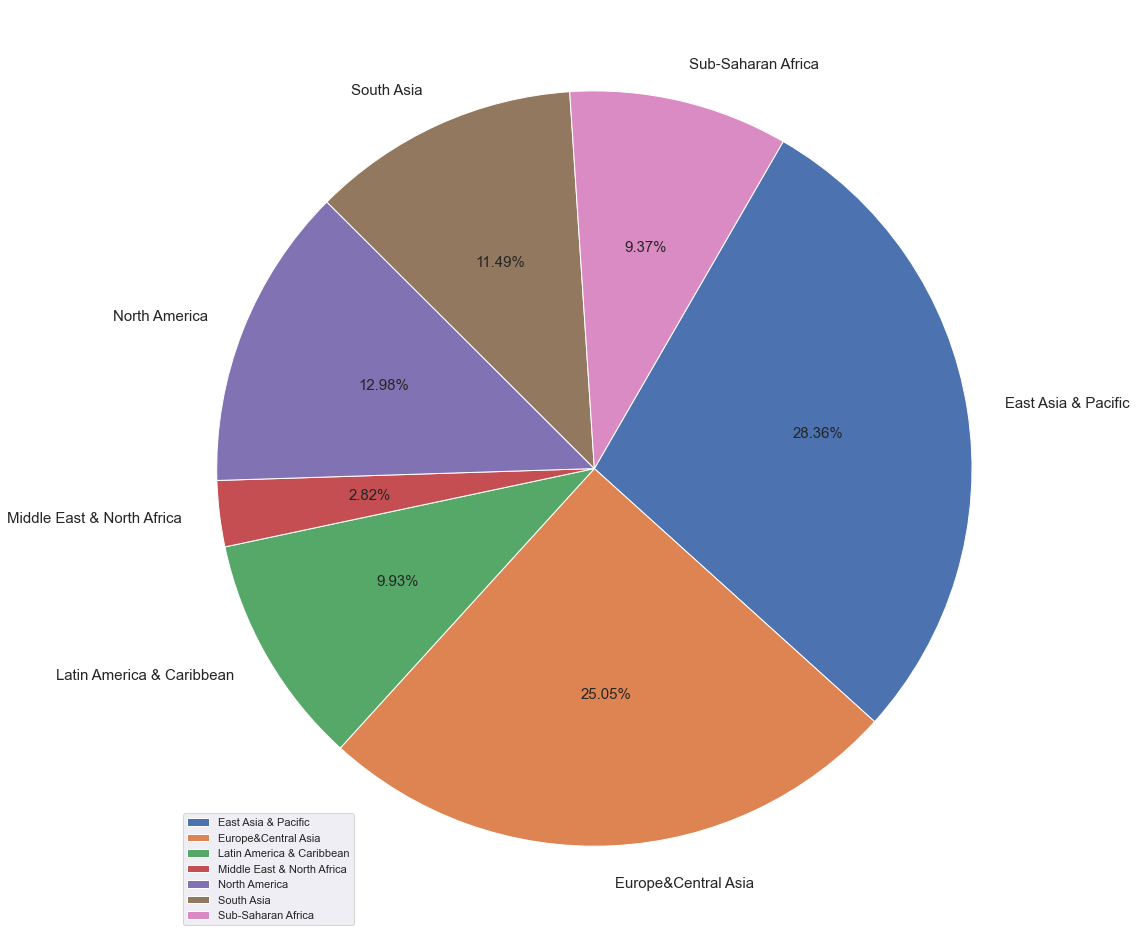

In [117]:
total_sum=ch4_1970.groupby('region')['value'].sum().sum()
region_sum=ch4_1970.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) 
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)

plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

## 2018년

### 2018년 지역별 CH4배출량 시각화 

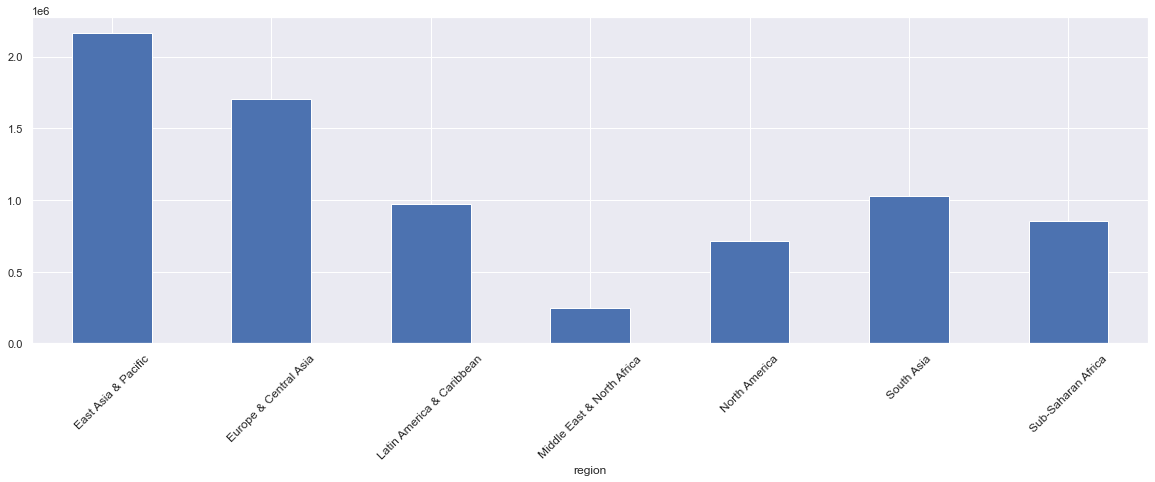

CH4 emissions(region)-2018

region
East Asia & Pacific           2165110.00
Europe & Central Asia         1706940.00
Latin America & Caribbean      974537.56
Middle East & North Africa     250050.00
North America                  716570.00
South Asia                    1024650.00
Sub-Saharan Africa             851980.00
Name: value, dtype: float64


In [118]:
plt.figure(figsize = (20,6))
ch4_2018_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45,fontsize=12)
plt.show()
print("CH4 emissions(region)-2018\n")
print(ch4_2018.groupby('region')['value'].sum())

### 2018년 각 지역의 CH4배출량/전체 지역의 CH4배출량 시각화 

region
East Asia & Pacific           28.155471
Europe & Central Asia         22.197348
Latin America & Caribbean     12.673058
Middle East & North Africa     3.251694
North America                  9.318402
South Asia                    13.324729
Sub-Saharan Africa            11.079298
Name: value, dtype: float64
100.0


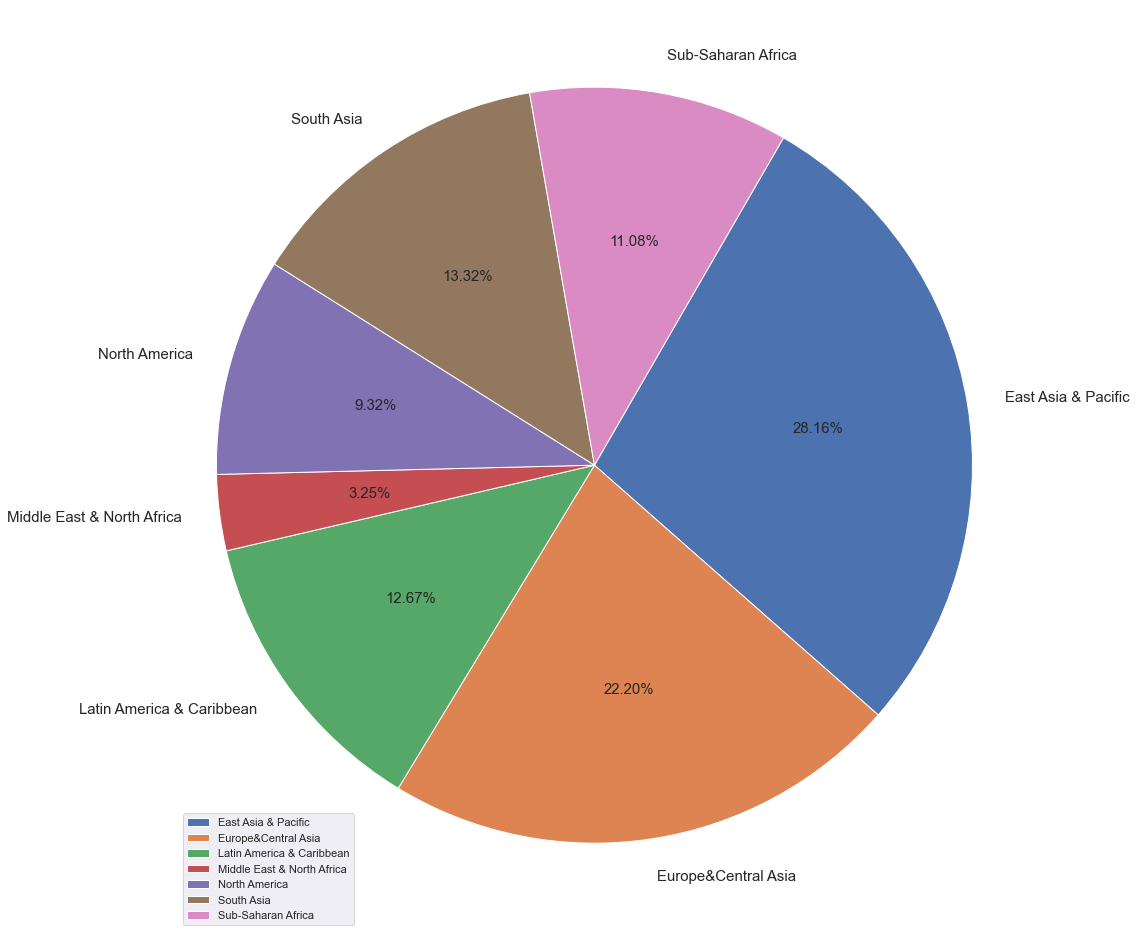

In [119]:
total_sum=ch4_2018.groupby('region')['value'].sum().sum()
region_sum=ch4_2018.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) 
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

### 해석: 지역별 CH4배출량 비율은 1970년과 2018년 사이에 큰 차이가 없음을 알 수 있다. 

## 가장 최근(2018년)에 CH4배출량이 가장 많았던 국가 5개를 뽑아내자. 

In [120]:
ch4_merged_clean2018=ch4_merged_clean[ch4_merged_clean.year=='2018'].sort_values('value',ascending=False)
ch4_merged_clean2018

,country_name,country_code,region,incomegroup,year,value
7324,China,CHN,East Asia & Pacific,Upper middle income,2018,1238630.0
7415,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,849570.0
7358,India,IND,South Asia,Lower middle income,2018,666510.0
7442,United States,USA,North America,High income,2018,622590.0
7315,Brazil,BRA,Latin America & Caribbean,Upper middle income,2018,416280.0
...,...,...,...,...,...,...
7421,Solomon Islands,SLB,East Asia & Pacific,Lower middle income,2018,410.0
7328,Comoros,COM,Sub-Saharan Africa,Lower middle income,2018,270.0
7386,Malta,MLT,Middle East & North Africa,High income,2018,220.0
7383,Maldives,MDV,South Asia,Upper middle income,2018,130.0


In [121]:
top5_ch4_2018=ch4_merged_clean2018.head(5).country_name[:5]
ch4_top5_country=[]
for country in top5_ch4_2018:
    ch4_top5_country.append(country)
ch4_top5_country

['China', 'Russian Federation', 'India', 'United States', 'Brazil']

* 가장 최근(2018년) CH4배출량이 가장 많았던 상위 국가 5개는 China, Russian Federation, India, United States, Brazil이다. 

## 추출한 5개 국가의 연도별 CH4배출량 합 추이를 그려보자. 

In [122]:
df_new_ch4=ch4_merged_clean[ch4_merged_clean['country_name'].isin(ch4_top5_country)]
df_new_ch4

,country_name,country_code,region,incomegroup,year,value
19,Brazil,BRA,Latin America & Caribbean,Upper middle income,1970,207737.0
28,China,CHN,East Asia & Pacific,Upper middle income,1970,781088.0
62,India,IND,South Asia,Lower middle income,1970,398212.0
119,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1970,338496.0
146,United States,USA,North America,High income,1970,594255.0
...,...,...,...,...,...,...
7315,Brazil,BRA,Latin America & Caribbean,Upper middle income,2018,416280.0
7324,China,CHN,East Asia & Pacific,Upper middle income,2018,1238630.0
7358,India,IND,South Asia,Lower middle income,2018,666510.0
7415,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,849570.0


In [123]:
df_new_ch4.set_index('year',inplace=True)
df_new_ch4

,country_name,country_code,region,incomegroup,value
year,,,,,
1970,Brazil,BRA,Latin America & Caribbean,Upper middle income,207737.0
1970,China,CHN,East Asia & Pacific,Upper middle income,781088.0
1970,India,IND,South Asia,Lower middle income,398212.0
1970,Russian Federation,RUS,Europe & Central Asia,Upper middle income,338496.0
1970,United States,USA,North America,High income,594255.0
...,...,...,...,...,...
2018,Brazil,BRA,Latin America & Caribbean,Upper middle income,416280.0
2018,China,CHN,East Asia & Pacific,Upper middle income,1238630.0
2018,India,IND,South Asia,Lower middle income,666510.0


## 추출한 5개 국가의 연도별 CH4배출량 합 추이

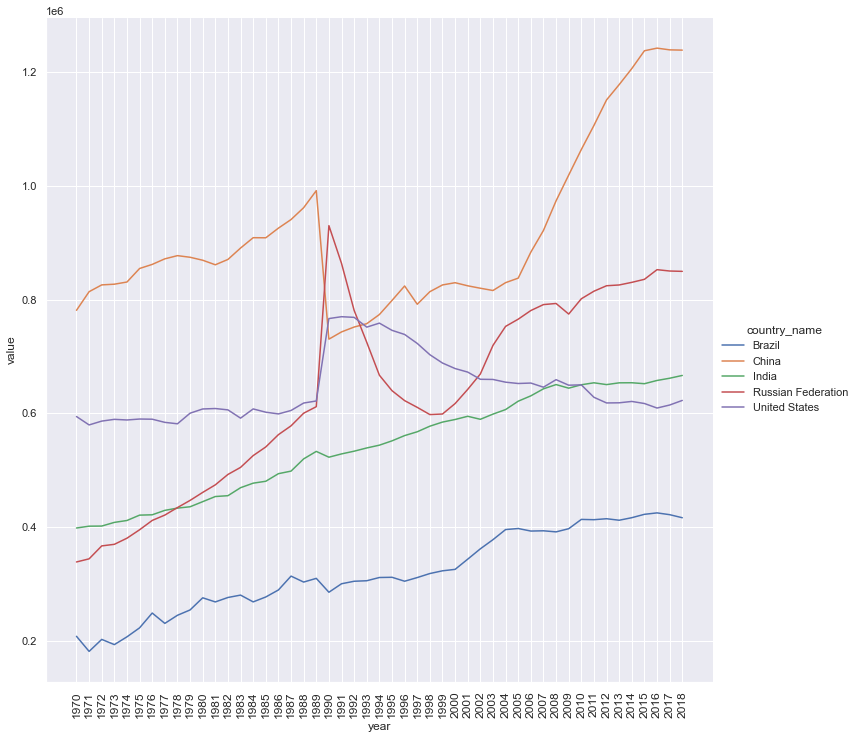

In [124]:
#추출한 5개 국가의 연도별 CH4배출량 합 추이

sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)
#sns.set(font_scale=0.5)

g=sns.relplot(x=df_new_ch4.index,y=df_new_ch4.value,hue=df_new_ch4.country_name,height=10,kind='line')
plt.xticks(size=12,rotation=90)
plt.show()

### 해석:1970년 CH4 배출량 순위는 중국, 미국, 인도, 러시아 순으로 높았으나 2018년에는 미국과 러시아의 순위가 변경되었다. 한편, 지역별 배출량 비율은 두 기간 모두 큰 차이가 없었다.

## 지역별 CH4배출량 합 추이 

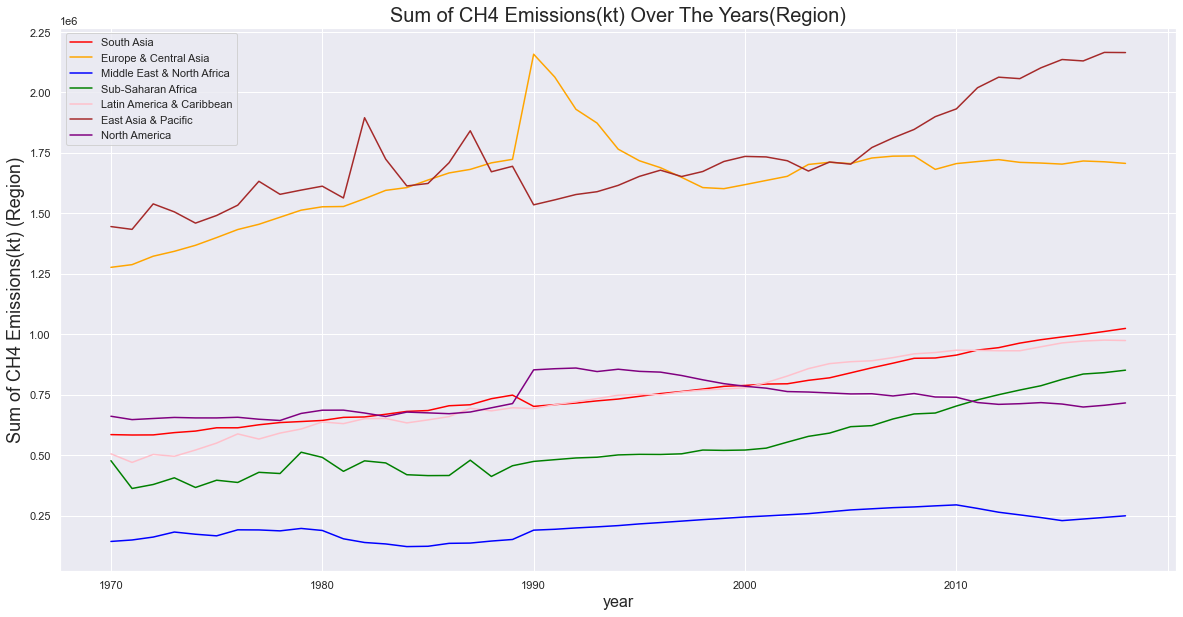

In [125]:
#지역별 CH4배출량 합 추이 
fig, ax = plt.subplots(figsize = (20,10))
ch4_merged_clean[ch4_merged_clean["region"] == "South Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "South Asia")
ch4_merged_clean[ch4_merged_clean["region"] == "Europe & Central Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Europe & Central Asia")
ch4_merged_clean[ch4_merged_clean["region"] == "Middle East & North Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Middle East & North Africa")
ch4_merged_clean[ch4_merged_clean["region"] == "Sub-Saharan Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Sub-Saharan Africa")
ch4_merged_clean[ch4_merged_clean["region"] == "Latin America & Caribbean"].groupby("year")["value"].sum().plot(ax = ax, color = "pink", label = "Latin America & Caribbean")
ch4_merged_clean[ch4_merged_clean["region"] == "East Asia & Pacific"].groupby("year")["value"].sum().plot(ax = ax, color = "brown", label = "East Asia & Pacific")
ch4_merged_clean[ch4_merged_clean["region"] == "North America"].groupby("year")["value"].sum().plot(ax = ax, color = "purple", label = "North America")

plt.xlabel("year", fontsize = 16)
plt.ylabel("Sum of CH4 Emissions(kt) (Region)", fontsize = 18) 
plt.title("Sum of CH4 Emissions(kt) Over The Years(Region)", fontsize = 20) 
plt.legend(fontsize = 11,loc='upper left')
plt.show()

## 세계 CH4배출량 합 추이 

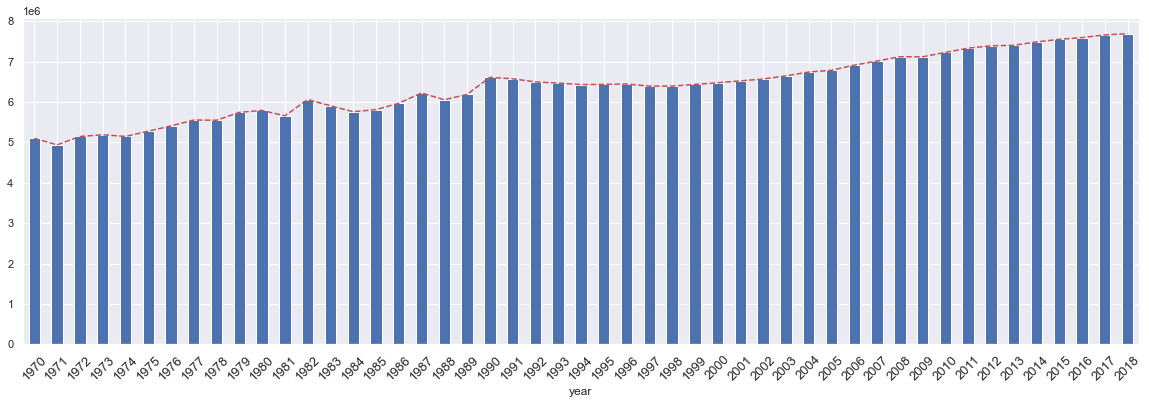

In [126]:
#세계 CH4배출량 합 추이 
plot_ch4_year= ch4_merged_clean.groupby("year")["value"].sum() 
plt.figure(figsize = (20,6))
plot_ch4_year.plot(kind='bar',rot=0)
plot_ch4_year.plot(kind='line',color='r',linestyle='--')
plt.xticks(rotation=45,size=13)
plt.show()

### 해석: CH4 또한 배출량은 꾸준히 증가했다. 

## Income Group별 CH4배출량

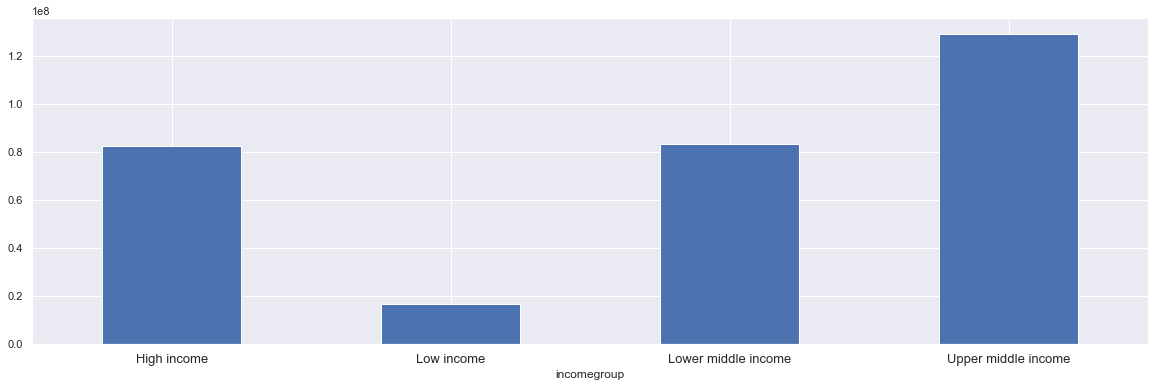

In [127]:
#Income Group별 CH4배출량 
plot_ch4_income= ch4_merged_clean.groupby("incomegroup")["value"].sum()
plt.figure(figsize = (20,6))
plot_ch4_income.plot(kind='bar',rot=0)
plt.xticks(size=13)
plt.show()

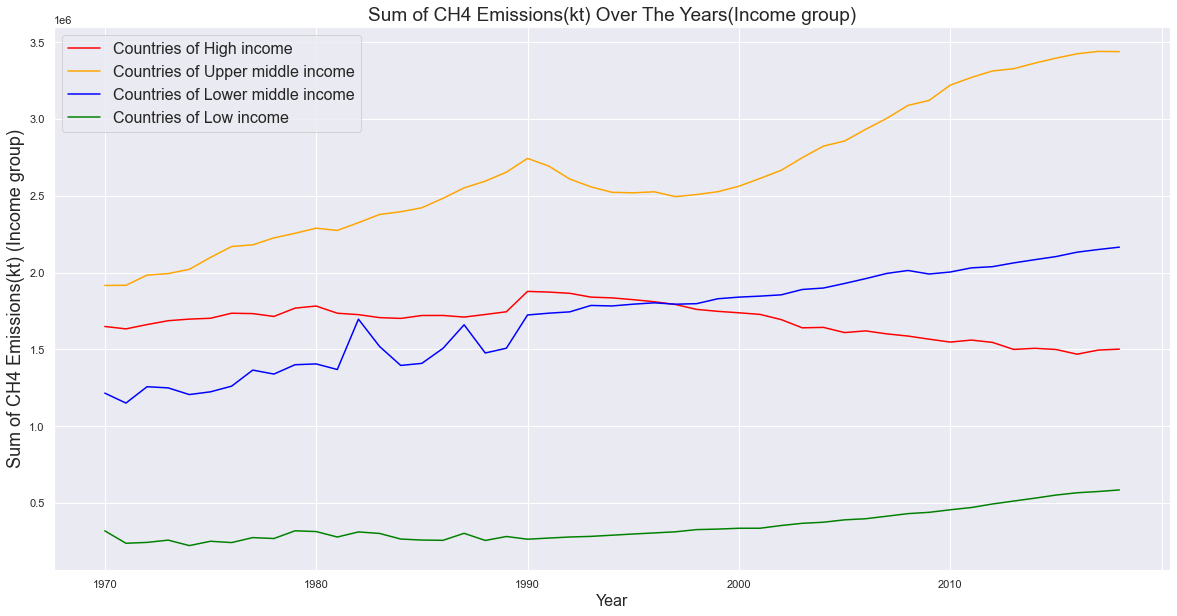

In [128]:
fig, ax = plt.subplots(figsize = (20,10))
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "High income"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "Countries of High income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Upper middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Countries of Upper middle income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Lower middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Countries of Lower middle income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Low income"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Countries of Low income")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Sum of CH4 Emissions(kt) (Income group)", fontsize = 18)
plt.title("Sum of CH4 Emissions(kt) Over The Years(Income group)", fontsize = 19) 
plt.legend(fontsize = 16,loc='upper left')
plt.show()

## CH4와 가축생산량 사이의 상관관계를 살펴보자. 
### -상관관계 분석을 위해 Country Code가 WLD(World)인 것만 가지고 와서 상관관계를 살펴보았다. 

In [129]:
ch4_raw_data=pd.read_csv('./dataset/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


In [130]:
livestock_raw_data=pd.read_csv('./dataset/가축생산량_쇠고기__20211124144555.csv', encoding='euc-kr')
livestock_raw_data.head()

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,World,45565944,45953128,45914058,47159800,48483781,49306824,50983632,50940348,51339867,...,62646774,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Korea, Rep.",93000,69000,61000,66000,90000,118000,153000,158000,133000,...,186000,216000,234000,260000,261000,255000,231000,239000,237000,245000
3,Afghanistan,67000,68000,69000,68000,68000,68000,68000,70000,71000,...,131000,138000,139000,134000,120545,111438,106054,95229,91920,95398
4,Albania,-,-,-,-,-,-,-,-,-,...,48000,48200,47600,53600,59000,63600,68100,70800,68800,68100


In [131]:
#ch4_raw_data에서 Country Code가 WLD인 행만 뽑아냄.
ch4_world=ch4_raw_data[ch4_raw_data['Country Code']=='WLD']

In [132]:
#livestock_raw_data에서 Country Name이 World인 행만 뽑아냄. 
livestock_world=livestock_raw_data[livestock_raw_data['Country Name']=='World']

In [133]:
livestock_world['Indicator Name']=['livestock production volume']

In [134]:
ch4_world

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN


In [135]:
livestock_world

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Indicator Name
0,World,45565944,45953128,45914058,47159800,48483781,49306824,50983632,50940348,51339867,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,livestock production volume


In [136]:
merged_ch4_livestock=pd.concat([ch4_world,livestock_world],axis=0)
merged_ch4_livestock

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN
0,World,NaN,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [137]:
merged_ch4_livestock.reset_index(drop=True)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN
1,World,NaN,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [138]:
merged_ch4_livestock.drop(['Country Name','Country Code','Indicator Code'],axis=1,inplace=True)
merged_ch4_livestock

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN
0,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [139]:
merged_ch4_livestock.set_index('Indicator Name',inplace=True)
merged_ch4_livestock

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN
livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [140]:
merged_ch4_livestock.reset_index()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN
1,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


## 상관관계 분석 위한 새로운 데이터프레임 형성

In [141]:
transpose_merged_ch4_livestock=merged_ch4_livestock.transpose()
transpose_merged_ch4_livestock

Indicator Name,Methane emissions (kt of CO2 equivalent),livestock production volume
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
...,...,...
2016,8068580.0,64358236
2017,8137390.0,65591737
2018,8174420.0,67320903
2019,NaN,68313894


In [142]:
transpose_merged_ch4_livestock.dropna(axis=0,inplace=True)
transpose_merged_ch4_livestock

Indicator Name,Methane emissions (kt of CO2 equivalent),livestock production volume
1980,5997921.796,45565944
1981,5858004.267,45953128
1982,6275398.892,45914058
1983,6126518.821,47159800
1984,5973200.541,48483781
1985,6025375.248,49306824
1986,6184970.687,50983632
1987,6449419.461,50940348
1988,6276209.592,51339867
1989,6416172.961,51557846


In [143]:
series1=transpose_merged_ch4_livestock['Methane emissions (kt of CO2 equivalent)'].astype(int)
series2=transpose_merged_ch4_livestock['livestock production volume'].astype(int)
final_ch4_livestock=pd.concat([series1,series2],axis=1)

In [144]:
final_ch4_livestock

,Methane emissions (kt of CO2 equivalent),livestock production volume
1980,5997921,45565944
1981,5858004,45953128
1982,6275398,45914058
1983,6126518,47159800
1984,5973200,48483781
1985,6025375,49306824
1986,6184970,50983632
1987,6449419,50940348
1988,6276209,51339867
1989,6416172,51557846


In [145]:
#컬럼명을 보기 좋게 변경 
final_ch4_livestock.rename(columns={'Methane emissions (kt of CO2 equivalent)':'CH4','livestock production volume':'livestock'},inplace=True)
final_ch4_livestock

,CH4,livestock
1980,5997921,45565944
1981,5858004,45953128
1982,6275398,45914058
1983,6126518,47159800
1984,5973200,48483781
1985,6025375,49306824
1986,6184970,50983632
1987,6449419,50940348
1988,6276209,51339867
1989,6416172,51557846


In [146]:
final_ch4_livestock.describe()

,CH4,livestock
count,3.900000e+01,3.900000e+01
mean,7.011092e+06,5.611803e+07
std,6.777473e+05,6.150793e+06
min,5.858004e+06,4.556594e+07
25%,6.599524e+06,5.175370e+07
50%,6.875120e+06,5.529346e+07
75%,7.588570e+06,6.230975e+07
max,8.174420e+06,6.732090e+07


## CH4와 가축생산량 변수 간 상관계수 구하기 

In [147]:
corr_ch4_livestock=final_ch4_livestock[['CH4','livestock']].corr(method='pearson')
corr_ch4_livestock

,CH4,livestock
CH4,1.000000,0.974975
livestock,0.974975,1.000000


## Heatmap을 통한 상관계수 시각화

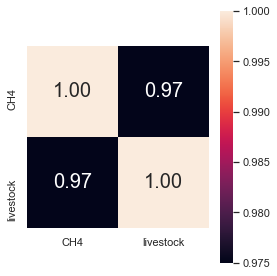

<Figure size 216x216 with 0 Axes>

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['CH4','livestock']
plt.figure(figsize=(4,4))
sns.set(font_scale=1)
hm = sns.heatmap(corr_ch4_livestock.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 20},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.figure(figsize=(3,3))
plt.show()

### 해석: 가축생산량과 CH4 배출량 사이의 상관관계가 높음을 알 수 있다. 

# 재생에너지 현황

In [149]:
global_renewable = pd.read_csv('./dataset/modern-renewable-energy-consumption.csv')
global_renewable = global_renewable[global_renewable['Entity']=='World']

In [150]:
global_renewable

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
4947,World,OWID_WRL,1965,0.000000,0.000000,17.985232,923.197924
4948,World,OWID_WRL,1966,0.000000,0.000000,19.806007,983.817037
4949,World,OWID_WRL,1967,0.000000,0.000000,19.986571,1005.742652
4950,World,OWID_WRL,1968,0.000000,0.000000,22.120045,1059.289008
4951,World,OWID_WRL,1969,0.000000,0.000000,23.257964,1121.743221
4952,World,OWID_WRL,1970,0.000000,0.000000,25.693196,1174.647576
4953,World,OWID_WRL,1971,0.000000,0.000000,27.879168,1227.065005
4954,World,OWID_WRL,1972,0.000000,0.000000,29.877101,1284.630368
4955,World,OWID_WRL,1973,0.000000,0.000000,32.084924,1303.009488
4956,World,OWID_WRL,1974,0.000000,0.000000,33.958814,1431.264984


In [151]:
renewable_y = ['Hydro Generation - TWh', 'Wind Generation - TWh', 
               'Solar Generation - TWh', 'Geo Biomass Other - TWh']

fig = px.area(global_renewable, x="Year", y=renewable_y, title='Renewable Energy Generation, World',
             labels={'value':'measured on terawatt-hours (TWh)'})

fig.show()

### 해석: 세계적으로 수력에너지 생산량이 가장 많고 풍력 생산량이 급격히 증가하고 있음을 알 수 있다. 

In [152]:
renewable_energy_value=pd.read_csv('./dataset/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3160040_renewable_energy.csv')
renewable_energy_value.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701,NaN,NaN
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500,NaN,NaN


In [153]:
renewable_energy_value.shape

(266, 65)

In [154]:
renewable_energy_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

## 재생에너지 데이터(renewable_energy_value) 전처리 

In [155]:
renewable_energy_value.drop(columns=['Indicator Name','Indicator Code','1960','1961',
                       '1962','1963','1964','1965','1966','1967',
                       '1968','1969','1970','1971','1972','1973','1974','1975',
                       '1976','1977','1978','1979','1980','1981','1982',
                       '1983','1984','1985','1986','1987','1988','1989','2019','2020'],axis=1,inplace=True)

In [156]:
renewable_energy_value.shape

(266, 31)

* 분석 시 필요없는 열(컬럼) 제거

In [157]:
#분석 시 필요없는 열(컬럼) 제거 
renewable_energy_value.columns=change_col(renewable_energy_value.columns)

* 결측치 처리(bfill)

In [158]:
#결측치 처리(bfill)
renewable_energy_value.iloc[:,2:] = renewable_energy_value.iloc[:,2:].fillna(method='bfill',axis=1)
f_renewable_energy_value_data=renewable_energy_value

In [159]:
f_renewable_energy_value_data.head()

,country_name,country_code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100
1,Africa Eastern and Southern,AFE,61.625965,62.876319,64.636541,65.291676,65.379764,64.982510,64.218668,63.385625,...,61.252554,62.564529,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN
2,Afghanistan,AFG,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701
3,Africa Western and Central,AFW,86.082214,85.443014,83.983071,85.305307,86.763667,86.348199,85.281256,83.947937,...,82.615425,80.933623,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN
4,Angola,AGO,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500


* 결측치 처리(ffill)

In [160]:
#결측치 처리(ffill)
f_renewable_energy_value_data.iloc[:,2:] = f_renewable_energy_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_renewable_energy_value_data=f_renewable_energy_value_data

In [161]:
final_renewable_energy_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1990          261 non-null    float64
 3   1991          261 non-null    float64
 4   1992          261 non-null    float64
 5   1993          261 non-null    float64
 6   1994          261 non-null    float64
 7   1995          261 non-null    float64
 8   1996          261 non-null    float64
 9   1997          261 non-null    float64
 10  1998          261 non-null    float64
 11  1999          261 non-null    float64
 12  2000          261 non-null    float64
 13  2001          261 non-null    float64
 14  2002          261 non-null    float64
 15  2003          261 non-null    float64
 16  2004          261 non-null    float64
 17  2005          261 non-null    float64
 18  2006          261 non-null    

In [162]:
year_data_renewable_energy=final_renewable_energy_value_data.iloc[:,2:]

In [163]:
cols3=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
      '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
      '2015','2016','2017','2018']

* 음수값이 포함된 행을 삭제하기 위해 음수값이 포함된 행의 인덱스를 찾는다. 

In [164]:
#음수값이 포함된 행의 인덱스를 찾는다. 
zero_list3=[]
for col in cols3:
    idx3=year_data_renewable_energy[year_data_renewable_energy[col]<0].index
    
    if (len(idx3))>0:
        zero_list.append(idx3)

In [165]:
zero_list3  
#빈 리스트가 출력디는 것을 보니 음수값이 없음을 알 수 있다. 

[]

* country_list에 포함된 국가만을 남긴다. 

In [166]:
final_renewable_energy_value_data=final_renewable_energy_value_data[final_renewable_energy_value_data['country_name'].isin(country_list)]
final_renewable_energy_value_data.shape

(152, 31)

# 어느 나라가 재생에너지에 관심을 가지고 재생에너지 사용 비율을 늘리고 있는지 살펴보자. 

## 재생에너지 사용률 차이를 구한 후 시각화 
* 1998년에 비해 2018년 사용률이 얼마나 증가했는지, 
* 2008년에 비해 2018년 사용률이 얼마나 증가했는지,
* 1998년에 비해 2008년 사용률이 얼마나 증가했는지

In [167]:
diff_2018_1998= final_renewable_energy_value_data['2018'].values - final_renewable_energy_value_data['1998'].values
diff_2018_2008=final_renewable_energy_value_data['2018'].values - final_renewable_energy_value_data['2008'].values
diff_2008_1998=final_renewable_energy_value_data['2008'].values - final_renewable_energy_value_data['1998'].values

In [168]:
x, y = (list(x) for x in zip(*sorted(zip(diff_2018_1998, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))
x2,y2=(list(x) for x in zip(*sorted(zip(diff_2018_2008, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))
x3,y3=(list(x) for x in zip(*sorted(zip(diff_2008_1998, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))

## 1998년에 비해 2018년 사용률이 얼마나 증가했는지 시각화

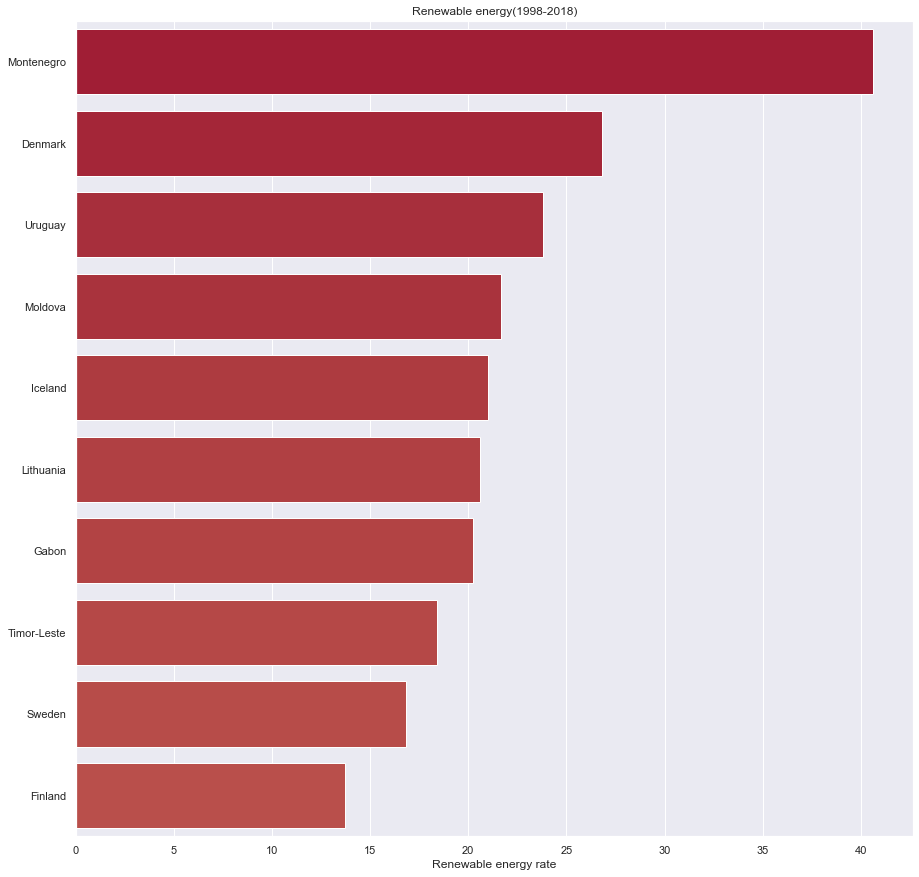

In [169]:
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(15,15))
colors_cw = sns.color_palette('coolwarm', len(x))
sns.barplot(x[0:10], y[0:10], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(1998-2018)')

## 2008년에 비해 2018년 사용률이 얼마나 증가했는지 시각화

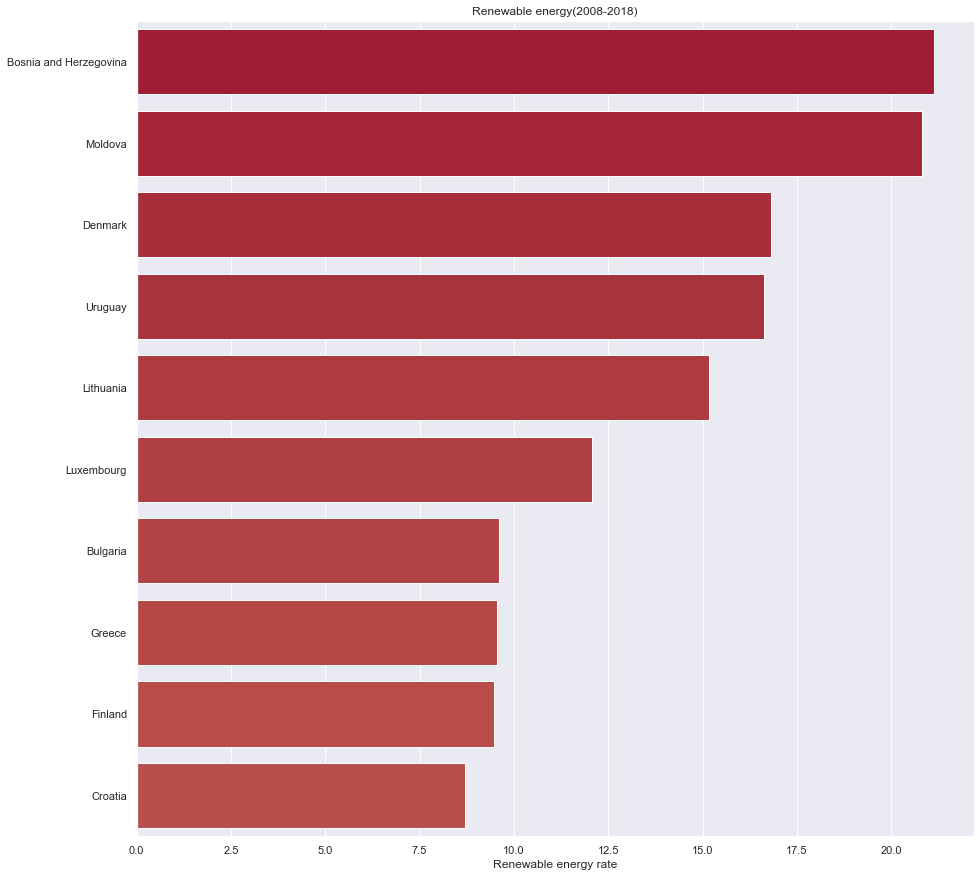

In [170]:
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(15,15))
colors_cw = sns.color_palette('coolwarm', len(x2))

sns.barplot(x2[0:10], y2[0:10], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(2008-2018)')

## 1998년에 비해 2008년 사용률이 얼마나 증가했는지 시각화

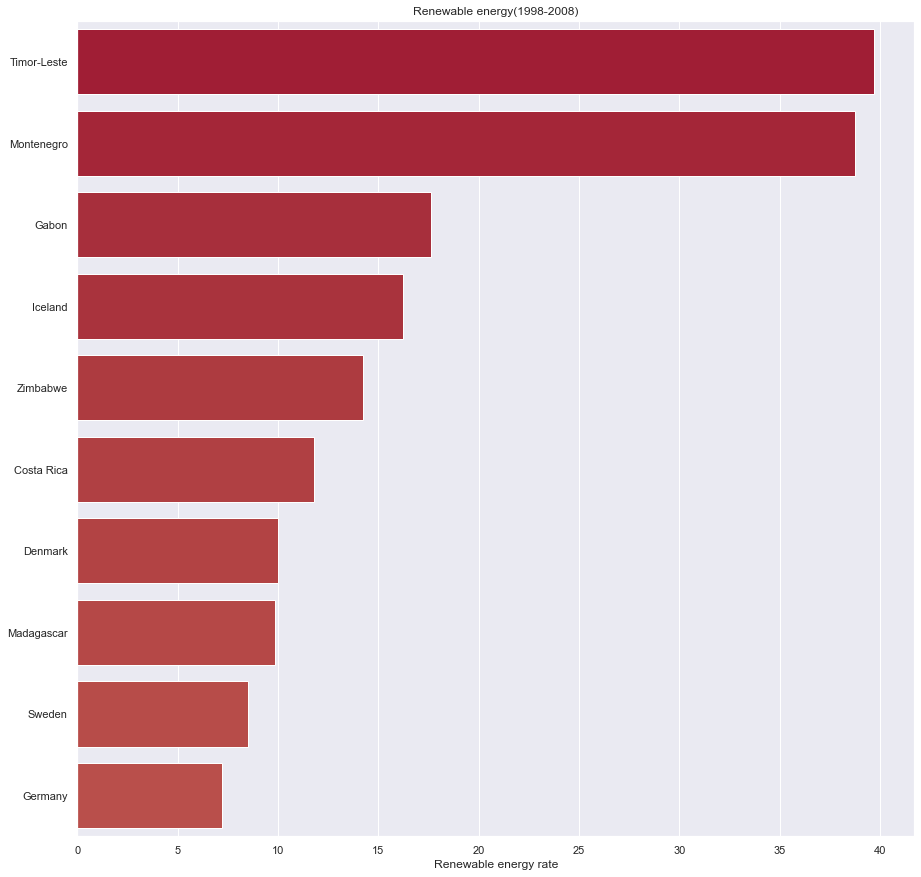

In [171]:
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(15,15))
colors_cw = sns.color_palette('coolwarm', len(x3))

sns.barplot(x3[0:10], y3[0:10], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(1998-2008)')

### 해석: 대체로 북유럽, 동유럽 및 다수의 아프리카 국가들에서 높은 재생에너지 사용률을보였다. 이는 자연 및 지형적 특성 때문이라고 유추해볼 수 있었다. 또한, 여러 재생에너지 중에서 수력 에너지 생산량이 가장 높다는 사실을 알 수 있었다.